# 1. Import Libraries to Use

In [51]:
# 
# Import library modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 2. Load Data

In [52]:
# 
# Load dataset
loan_eligibility_df = pd.read_csv('../data/loan_data.csv')

In [53]:
# 
# View DataFrame sample
loan_eligibility_df.sample(10)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
160  LP001560    Male     Yes          0  Not Graduate            No   
599  LP002948    Male     Yes          2      Graduate            No   
219  LP001734  Female     Yes          2      Graduate            No   
335  LP002106    Male     Yes        NaN      Graduate           Yes   
105  LP001367    Male     Yes          1      Graduate            No   
483  LP002541    Male     Yes          0      Graduate            No   
362  LP002175    Male     Yes          0      Graduate            No   
484  LP002543    Male     Yes          2      Graduate            No   
222  LP001744    Male      No          0      Graduate            No   
106  LP001369    Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
160             1863             1041.0        98.0             360.0   
599             5780                0.0       192.0             360.0   
219             4283             2383.0       127.0             360.0   
335             5503             4490.0        70.0               NaN   
105             3052             1030.0       100.0             360.0   
483            10833                0.0       234.0             360.0   
362             4750             2333.0       130.0             360.0   
484             8333                0.0       246.0             360.0   
222             2971             2791.0       144.0             360.0   
106            11417             1126.0       225.0             360.0   

     Credit_History Property_Area Loan_Status  
160             1.0     Semiurban           Y  
599             1.0         Urban           Y  
219             NaN     Semiurban           Y  
335             1.0     Semiurban           Y  
105             1.0         Urban           Y  
483             1.0     Semiurban           Y  
362             1.0         Urban           Y  
484             1.0     Semiurban           Y  
222             1.0     Semiurban           Y  
106             1.0         Urban           Y

In [54]:
loan_eligibility_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [55]:
# 
# Remove '+' sign to have consistency i.e., '3+' to '3'
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].replace('3+', '3').astype(float)
loan_eligibility_df['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

# 3. Data Cleaning and Preprocessing

## 3.1. Check for Null values and impute them appropriately

In [56]:
# 
# Check for number of rows and data types for each column
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [57]:
# 
# Check for null count in each column
loan_eligibility_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
# 
# Percentage of null values compared to total rows
# Gender - 2.12
# Married - 0.49
# Dependents - 2.44 
# Self_Employed - 5.21
# LoanAmount - 3.58
# Loan_Amount_Term - 2.28
# Credit_History - 8.14

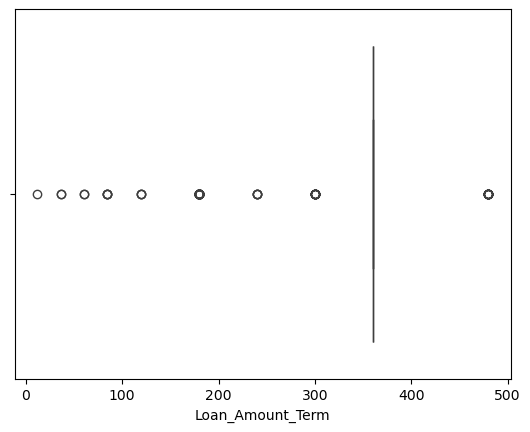

In [59]:
sns.boxplot(x = loan_eligibility_df['Loan_Amount_Term'])
plt.show()

In [60]:
loan_eligibility_df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

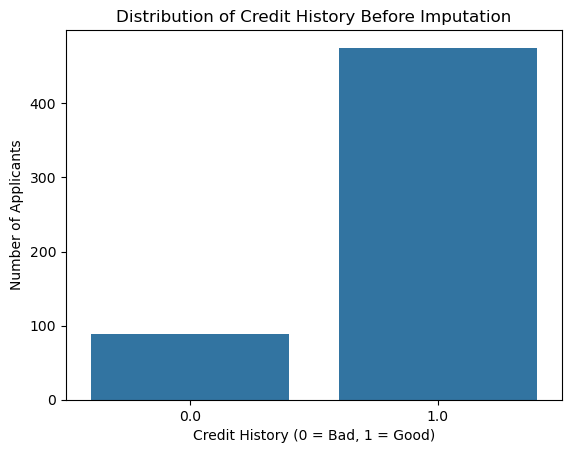

In [61]:
sns.countplot(x='Credit_History', data=loan_eligibility_df)
plt.title("Distribution of Credit History Before Imputation")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Number of Applicants")
plt.show()

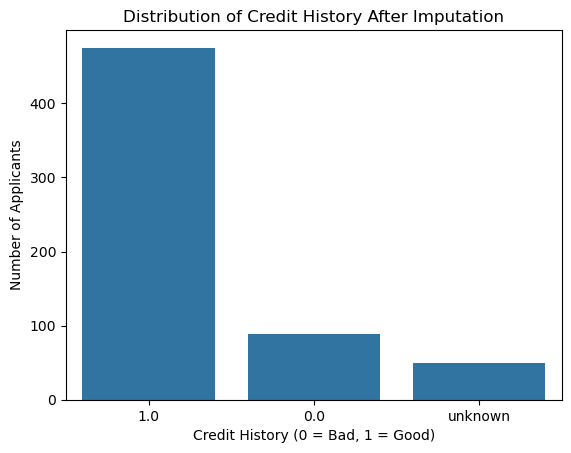

In [62]:
loan_eligibility_df2 = loan_eligibility_df.copy()
loan_eligibility_df2['Credit_History'] = loan_eligibility_df2['Credit_History'].fillna('unknown')
sns.countplot(x='Credit_History', data=loan_eligibility_df2)
plt.title("Distribution of Credit History After Imputation")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Number of Applicants")
plt.show()

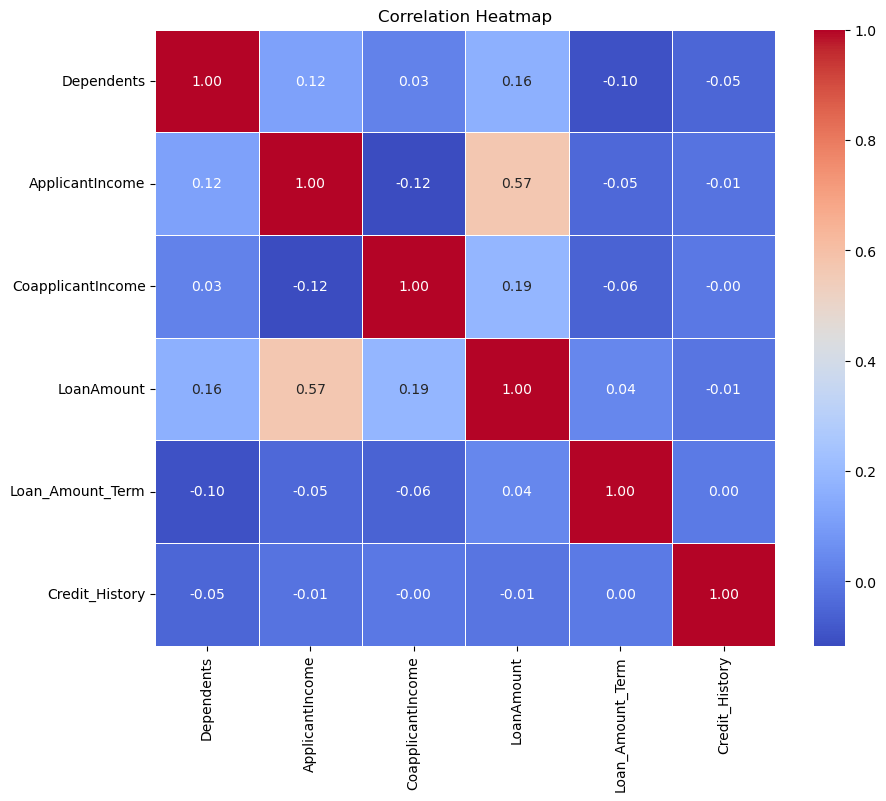

In [63]:
# Select only numeric columns (heatmap works with numbers only)
numeric_df = loan_eligibility_df.select_dtypes(include=['float64', 'int64'])
# 
# Calculate correlation matrix
corr_matrix = numeric_df.corr()
# 
# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [64]:
# 
# Percentage of null values compared to total rows and the solutions
# Gender    --> impute with mode since they are categorical values
# Married    --> impute with mode since they are categorical values
# Dependents    --> impute with mode then we'll use a function to change from string/object to float 
# Self_Employed    --> impute with mode since they are categorical values
# LoanAmount    --> impute with median because the mean will be distorted toward the outliers
# Loan_Amount_Term    --> impute using the mode amount since the column has fixed values 
# Credit_History    --> impute with 'unknown' because after visualization we noticed that the '1s' are significantly more and wouldn't alter the distribution as much. 

In [65]:
# 
# Impute 'Gender' column with mode
loan_eligibility_df['Gender'] = loan_eligibility_df['Gender'].fillna(loan_eligibility_df['Gender'].mode()[0])
# 
# Impute 'Married' column with mode
loan_eligibility_df['Married'] = loan_eligibility_df['Married'].fillna(loan_eligibility_df['Married'].mode()[0])
# 
# Impute 'Dependents' column with median since mean will give a float (e.g., there can't be 3.6 dependents) and mode can be zero hence skewing it toward that end
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].fillna(loan_eligibility_df['Dependents'].median())
# 
# Impute 'Dependents' column with mode
loan_eligibility_df['Self_Employed'] = loan_eligibility_df['Self_Employed'].fillna(loan_eligibility_df['Self_Employed'].mode()[0])
# 
# Impute 'LoanAmount' column with median
loan_eligibility_df['LoanAmount'] = loan_eligibility_df['LoanAmount'].fillna(loan_eligibility_df['LoanAmount'].median())
# 
# Impute 'Loan_Amount_Term' column with mode
loan_eligibility_df['Loan_Amount_Term'] = loan_eligibility_df['Loan_Amount_Term'].fillna(loan_eligibility_df['Loan_Amount_Term'].mode()[0])
# 
# Impute 'Credit_History' column with 'unknown' because there's a possibility of not knowing an applicant's credit history
loan_eligibility_df['Credit_History'] = loan_eligibility_df['Credit_History'].fillna('unknown')
loan_eligibility_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [66]:
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 3.2. Drop Loan_ID column

In [67]:
loan_eligibility_df = loan_eligibility_df.drop(['Loan_ID'], axis=1)
loan_eligibility_df

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No         0.0      Graduate            No             5849   
1      Male     Yes         1.0      Graduate            No             4583   
2      Male     Yes         0.0      Graduate           Yes             3000   
3      Male     Yes         0.0  Not Graduate            No             2583   
4      Male      No         0.0      Graduate            No             6000   
..      ...     ...         ...           ...           ...              ...   
609  Female      No         0.0      Graduate            No             2900   
610    Male     Yes         3.0      Graduate            No             4106   
611    Male     Yes         1.0      Graduate            No             8072   
612    Male     Yes         2.0      Graduate            No             7583   
613  Female      No         0.0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term Credit_History  \
0                  0.0       128.0             360.0            1.0   
1               1508.0       128.0             360.0            1.0   
2                  0.0        66.0             360.0            1.0   
3               2358.0       120.0             360.0            1.0   
4                  0.0       141.0             360.0            1.0   
..                 ...         ...               ...            ...   
609                0.0        71.0             360.0            1.0   
610                0.0        40.0             180.0            1.0   
611              240.0       253.0             360.0            1.0   
612                0.0       187.0             360.0            1.0   
613                0.0       133.0             360.0            0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

## 3.3.  Convert categorical variables into a suitable format for analysis

In [68]:
# 
# Convert 'Dependents' and 'LoanAmount'columns to integer
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].astype(int)
loan_eligibility_df['LoanAmount'] = loan_eligibility_df['LoanAmount'].astype(float)
# 
# Check if column changed data type
loan_eligibility_df['Dependents'].unique()

array([0, 1, 2, 3])

### 3.3.2. One Hot Encoding

DataFrame before Hot Encoding

In [69]:
loan_eligibility_df

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No           0      Graduate            No             5849   
1      Male     Yes           1      Graduate            No             4583   
2      Male     Yes           0      Graduate           Yes             3000   
3      Male     Yes           0  Not Graduate            No             2583   
4      Male      No           0      Graduate            No             6000   
..      ...     ...         ...           ...           ...              ...   
609  Female      No           0      Graduate            No             2900   
610    Male     Yes           3      Graduate            No             4106   
611    Male     Yes           1      Graduate            No             8072   
612    Male     Yes           2      Graduate            No             7583   
613  Female      No           0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term Credit_History  \
0                  0.0       128.0             360.0            1.0   
1               1508.0       128.0             360.0            1.0   
2                  0.0        66.0             360.0            1.0   
3               2358.0       120.0             360.0            1.0   
4                  0.0       141.0             360.0            1.0   
..                 ...         ...               ...            ...   
609                0.0        71.0             360.0            1.0   
610                0.0        40.0             180.0            1.0   
611              240.0       253.0             360.0            1.0   
612                0.0       187.0             360.0            1.0   
613                0.0       133.0             360.0            0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

In [70]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns=['Gender'], prefix = 'Gender', dtype = int)
loan_eligibility_df

Married  Dependents     Education Self_Employed  ApplicantIncome  \
0        No           0      Graduate            No             5849   
1       Yes           1      Graduate            No             4583   
2       Yes           0      Graduate           Yes             3000   
3       Yes           0  Not Graduate            No             2583   
4        No           0      Graduate            No             6000   
..      ...         ...           ...           ...              ...   
609      No           0      Graduate            No             2900   
610     Yes           3      Graduate            No             4106   
611     Yes           1      Graduate            No             8072   
612     Yes           2      Graduate            No             7583   
613      No           0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term Credit_History  \
0                  0.0       128.0             360.0            1.0   
1               1508.0       128.0             360.0            1.0   
2                  0.0        66.0             360.0            1.0   
3               2358.0       120.0             360.0            1.0   
4                  0.0       141.0             360.0            1.0   
..                 ...         ...               ...            ...   
609                0.0        71.0             360.0            1.0   
610                0.0        40.0             180.0            1.0   
611              240.0       253.0             360.0            1.0   
612                0.0       187.0             360.0            1.0   
613                0.0       133.0             360.0            0.0   

    Property_Area Loan_Status  Gender_Female  Gender_Male  
0           Urban           Y              0            1  
1           Rural           N              0            1  
2           Urban           Y              0            1  
3           Urban           Y              0            1  
4           Urban           Y              0            1  
..            ...         ...            ...          ...  
609         Rural           Y              1            0  
610         Rural           Y              0            1  
611         Urban           Y              0            1  
612         Urban           Y              0            1  
613     Semiurban           N              1            0  

[614 rows x 13 columns]

In [71]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Married'], prefix = 'Married', dtype = int)

In [72]:
# loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Dependents'], prefix = 'Dependents', dtype = int)

In [73]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Self_Employed'], prefix = 'Self_Employed', dtype = int)

In [74]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Credit_History'], prefix = 'Credit_History', dtype = int)

In [75]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Property_Area'], prefix = 'Property_Area', dtype = int)

In [76]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Loan_Status'], prefix = 'Loan_Status', dtype = int)

DataFrame after One Hot Encoding

In [77]:
loan_eligibility_df

Dependents     Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0             0      Graduate             5849                0.0       128.0   
1             1      Graduate             4583             1508.0       128.0   
2             0      Graduate             3000                0.0        66.0   
3             0  Not Graduate             2583             2358.0       120.0   
4             0      Graduate             6000                0.0       141.0   
..          ...           ...              ...                ...         ...   
609           0      Graduate             2900                0.0        71.0   
610           3      Graduate             4106                0.0        40.0   
611           1      Graduate             8072              240.0       253.0   
612           2      Graduate             7583                0.0       187.0   
613           0      Graduate             4583                0.0       133.0   

     Loan_Amount_Term  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               360.0              0            1           1            0   
1               360.0              0            1           0            1   
2               360.0              0            1           0            1   
3               360.0              0            1           0            1   
4               360.0              0            1           1            0   
..                ...            ...          ...         ...          ...   
609             360.0              1            0           1            0   
610             180.0              0            1           0            1   
611             360.0              0            1           0            1   
612             360.0              0            1           0            1   
613             360.0              1            0           1            0   

     Self_Employed_No  Self_Employed_Yes  Credit_History_0.0  \
0                   1                  0                   0   
1                   1                  0                   0   
2                   0                  1                   0   
3                   1                  0                   0   
4                   1                  0                   0   
..                ...                ...                 ...   
609                 1                  0                   0   
610                 1                  0                   0   
611                 1                  0                   0   
612                 1                  0                   0   
613                 0                  1                   1   

     Credit_History_1.0  Credit_History_unknown  Property_Area_Rural  \
0                     1                       0                    0   
1                     1                       0                    1   
2                     1                       0                    0   
3                     1                       0                    0   
4                     1                       0                    0   
..                  ...                     ...                  ...   
609                   1                       0                    1   
610                   1                       0                    1   
611                   1                       0                    0   
612                   1                       0                    0   
613                   0                       0                    0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_N  \
0                          0                    1              0   
1                          0                    0              1   
2                          0                    1              0   
3                          0                    1              0   
4                          0                    1              0   
..                       ...                  ...    

### 3.3.3. Label Encoding Ordinal Columns

In [78]:
loan_eligibility_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [79]:
# 
# Since Label Encoder by default assigns labels alphabetically (e.g., 'Graduate' = 0 and 'Not Graduate' = 1) we first map the values to (e.g., 'B_Graduate' = 0 and 'A_Not Graduate')
loan_eligibility_df['Education'] = loan_eligibility_df['Education'].map({
    'Graduate': 'B_Graduate',
    'Not Graduate': 'A_Not Graduate'
})
lbl_encoder = LabelEncoder()
loan_eligibility_df['Education'] = lbl_encoder.fit_transform(loan_eligibility_df['Education'])
loan_eligibility_df

Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0             0          1             5849                0.0       128.0   
1             1          1             4583             1508.0       128.0   
2             0          1             3000                0.0        66.0   
3             0          0             2583             2358.0       120.0   
4             0          1             6000                0.0       141.0   
..          ...        ...              ...                ...         ...   
609           0          1             2900                0.0        71.0   
610           3          1             4106                0.0        40.0   
611           1          1             8072              240.0       253.0   
612           2          1             7583                0.0       187.0   
613           0          1             4583                0.0       133.0   

     Loan_Amount_Term  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               360.0              0            1           1            0   
1               360.0              0            1           0            1   
2               360.0              0            1           0            1   
3               360.0              0            1           0            1   
4               360.0              0            1           1            0   
..                ...            ...          ...         ...          ...   
609             360.0              1            0           1            0   
610             180.0              0            1           0            1   
611             360.0              0            1           0            1   
612             360.0              0            1           0            1   
613             360.0              1            0           1            0   

     Self_Employed_No  Self_Employed_Yes  Credit_History_0.0  \
0                   1                  0                   0   
1                   1                  0                   0   
2                   0                  1                   0   
3                   1                  0                   0   
4                   1                  0                   0   
..                ...                ...                 ...   
609                 1                  0                   0   
610                 1                  0                   0   
611                 1                  0                   0   
612                 1                  0                   0   
613                 0                  1                   1   

     Credit_History_1.0  Credit_History_unknown  Property_Area_Rural  \
0                     1                       0                    0   
1                     1                       0                    1   
2                     1                       0                    0   
3                     1                       0                    0   
4                     1                       0                    0   
..                  ...                     ...                  ...   
609                   1                       0                    1   
610                   1                       0                    1   
611                   1                       0                    0   
612                   1                       0                    0   
613                   0                       0                    0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_N  \
0                          0                    1              0   
1                          0                    0              1   
2                          0                    1              0   
3                          0                    1              0   
4                          0                    1              0   
..                       ...                  ...            ...   
609                  

## 3.4. Check for outliers and treat them

In [80]:
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   Education                614 non-null    int64  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Gender_Female            614 non-null    int64  
 7   Gender_Male              614 non-null    int64  
 8   Married_No               614 non-null    int64  
 9   Married_Yes              614 non-null    int64  
 10  Self_Employed_No         614 non-null    int64  
 11  Self_Employed_Yes        614 non-null    int64  
 12  Credit_History_0.0       614 non-null    int64  
 13  Credit_History_1.0       614 non-null    int64  
 14  Credit_History_unknown   6

### 3.4.1 Check for Normality

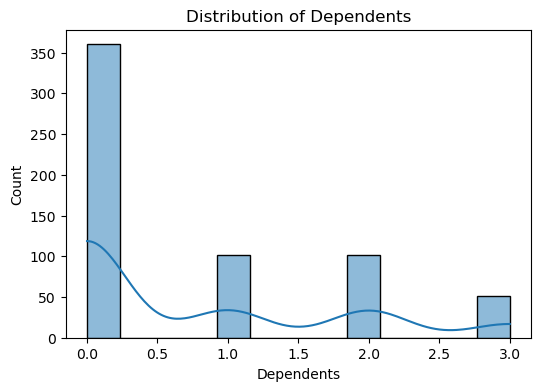

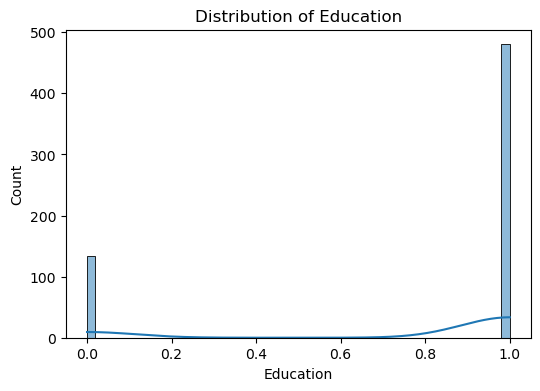

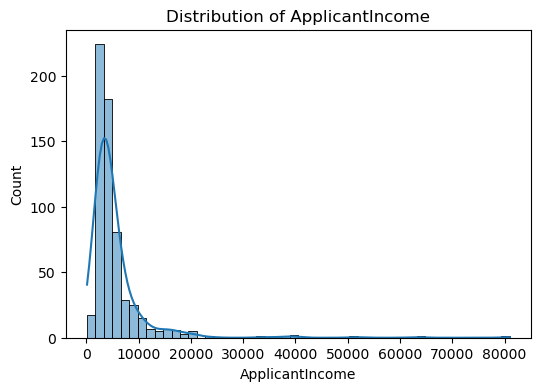

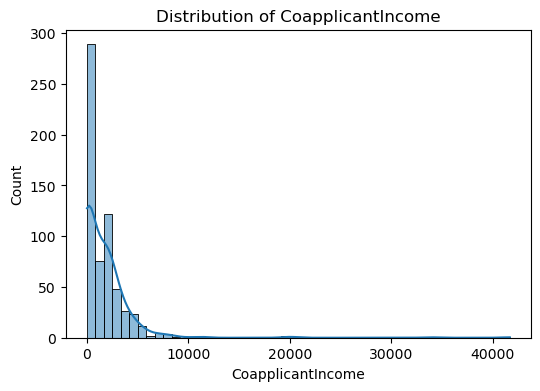

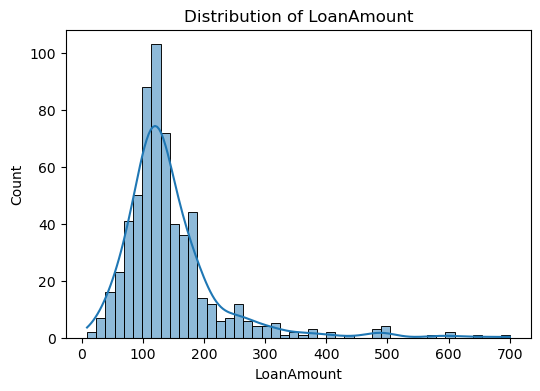

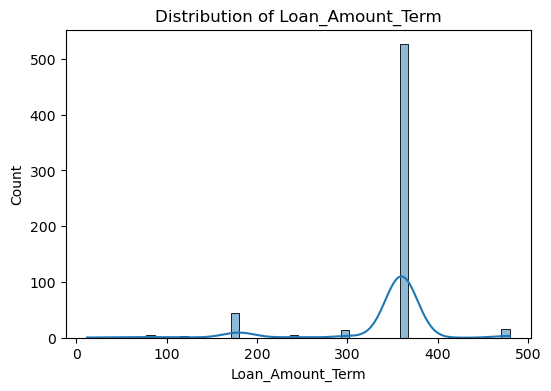

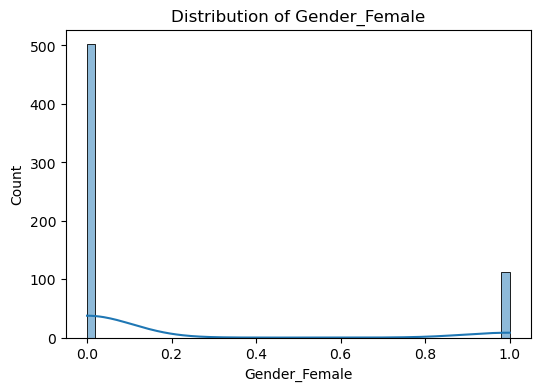

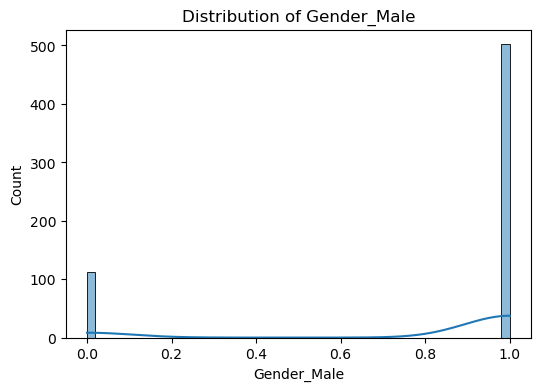

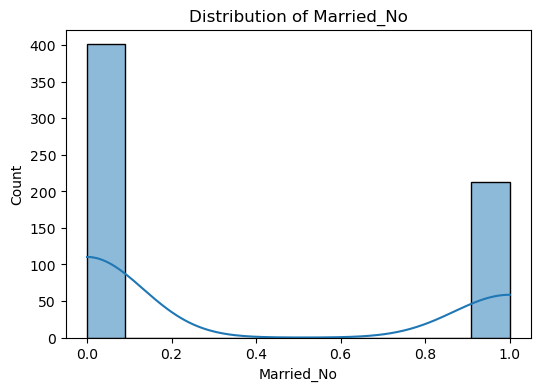

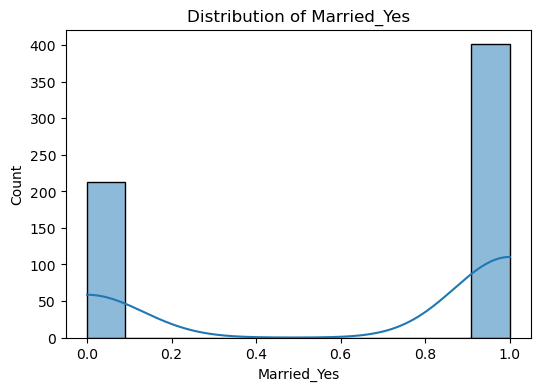

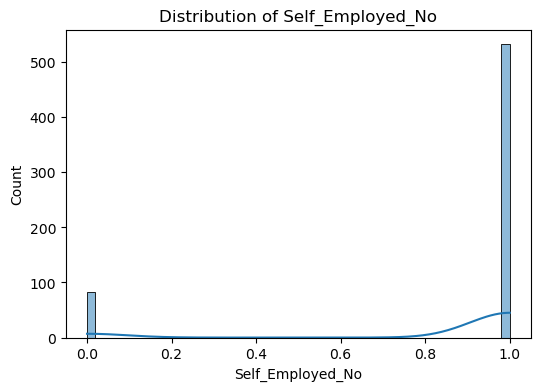

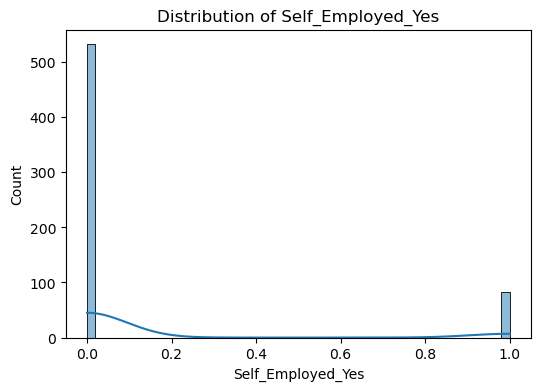

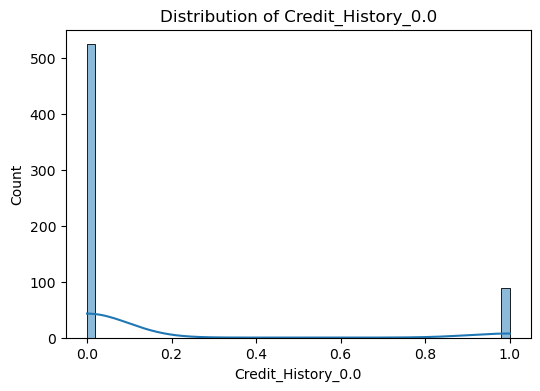

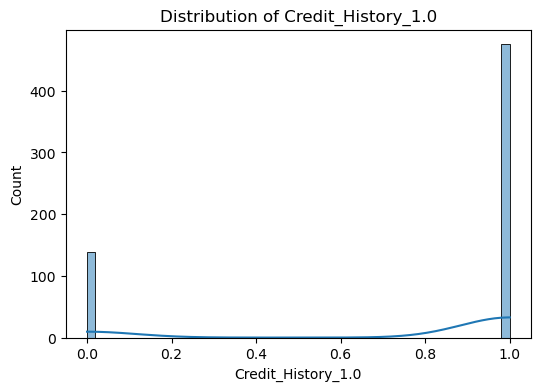

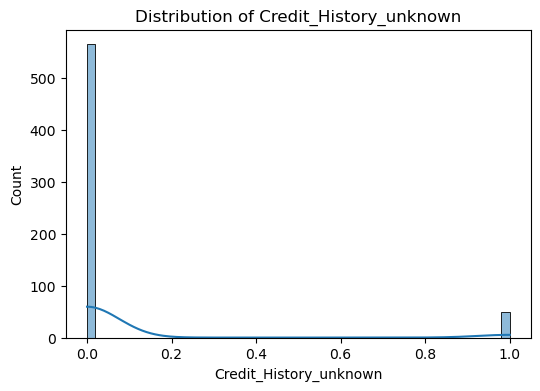

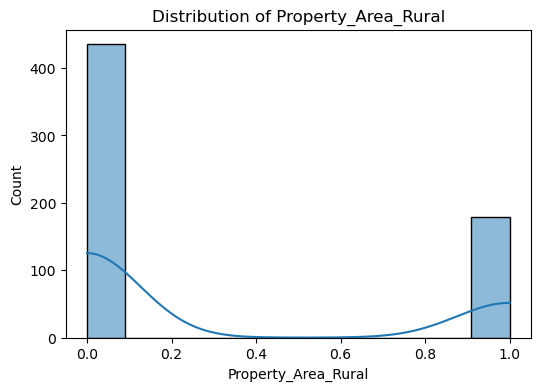

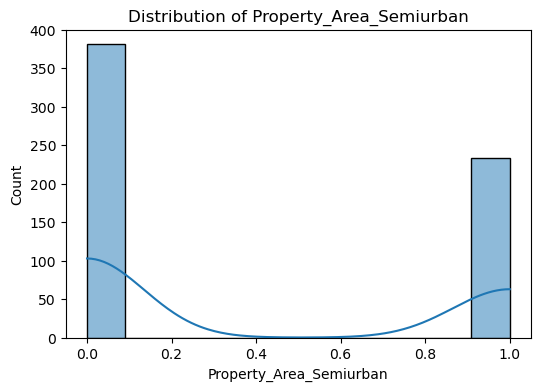

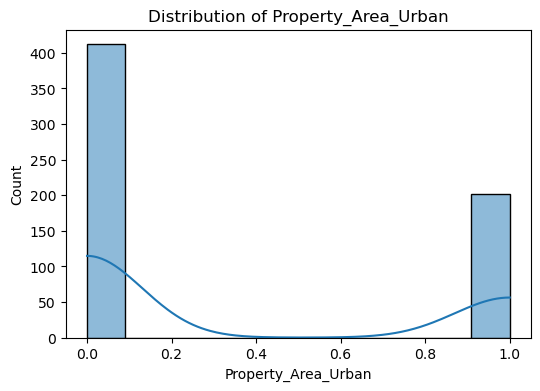

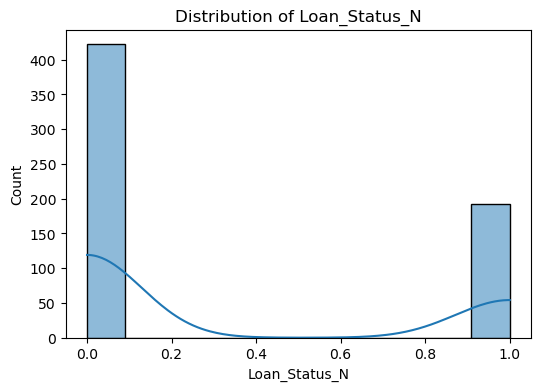

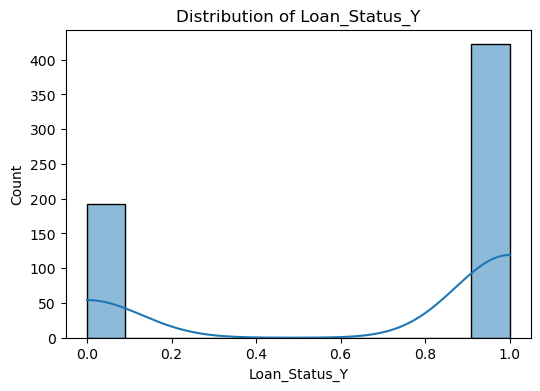

In [81]:
for col in loan_eligibility_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(loan_eligibility_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

#### 3.4.1.1. Check or Skewness

Skewness ≈ 0 → roughly symmetric (normal)

Skewness > +1 → highly positively skewed (long right tail)

Skewness < -1 → highly negatively skewed (long left tail)

Between -0.5 and +0.5 → approximately symmetric

In [82]:
df_num_cols = loan_eligibility_df.select_dtypes(include=['int64', 'float64'])
skewness = df_num_cols.skew()
skewness

Dependents                 1.015551
Education                 -1.367622
ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.402112
Gender_Female              1.648795
Gender_Male               -1.648795
Married_No                 0.644850
Married_Yes               -0.644850
Self_Employed_No          -2.159796
Self_Employed_Yes          2.159796
Credit_History_0.0         2.021971
Credit_History_1.0        -1.310835
Credit_History_unknown     3.068326
Property_Area_Rural        0.919670
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Loan_Status_N              0.809998
Loan_Status_Y             -0.809998
dtype: float64

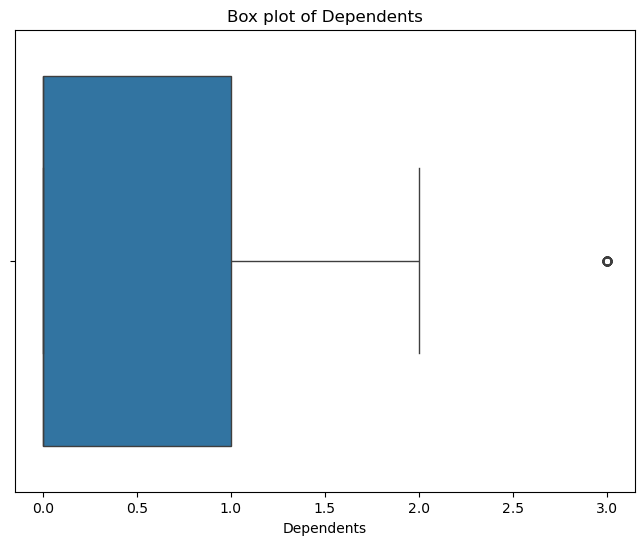

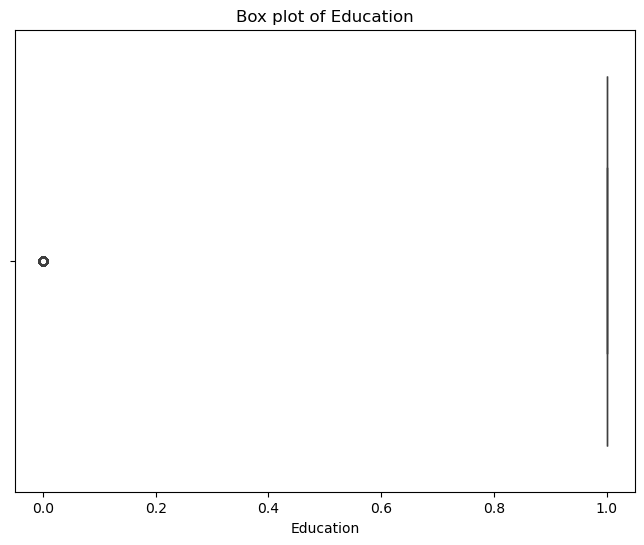

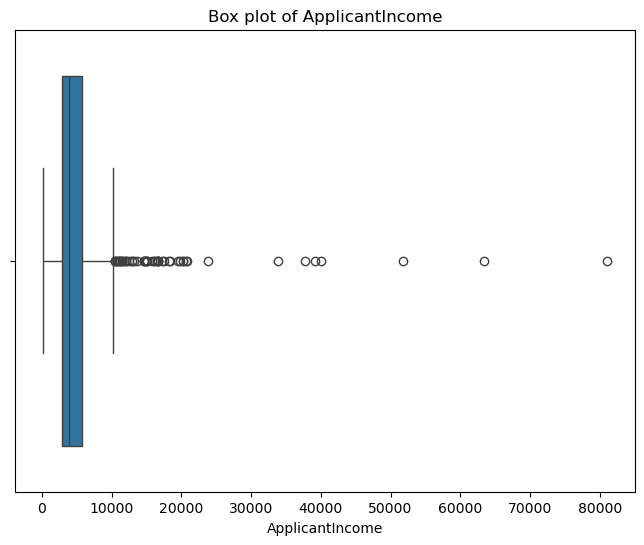

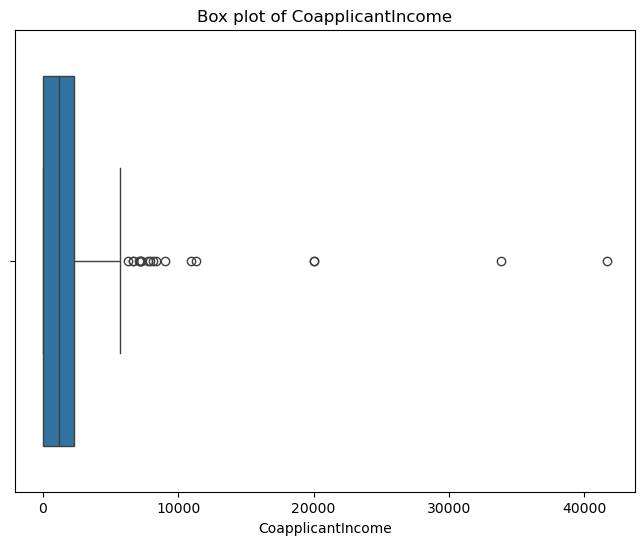

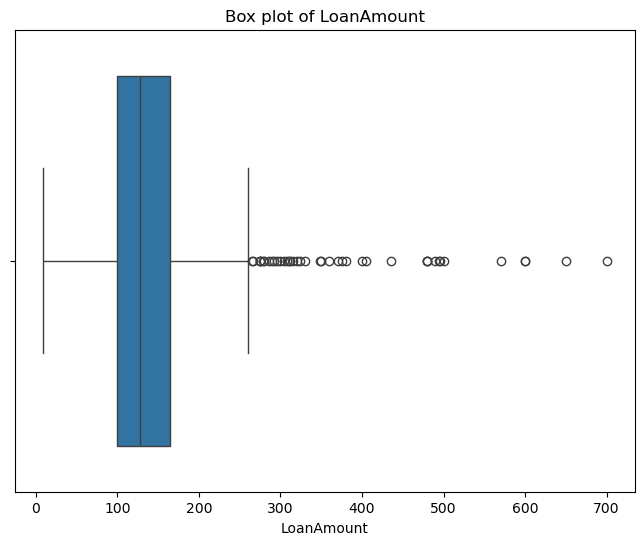

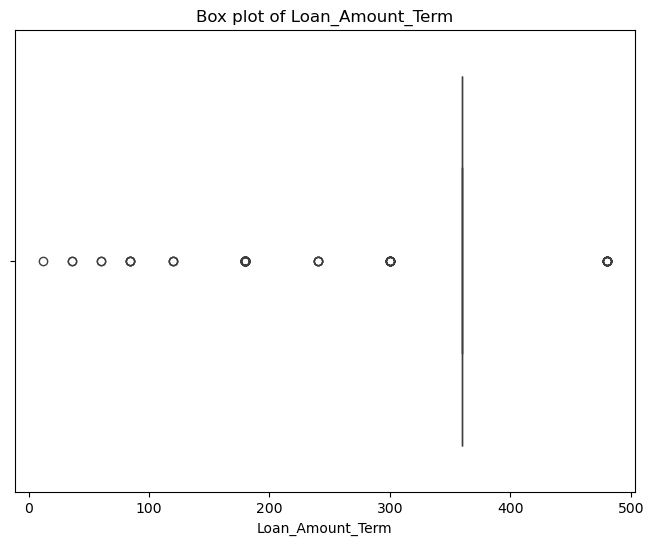

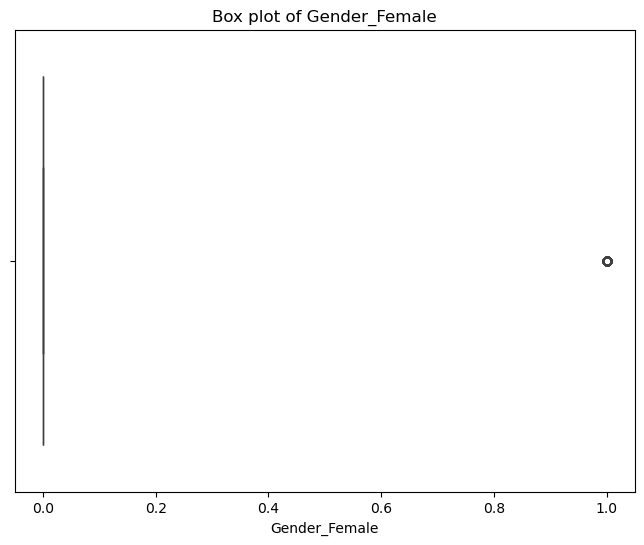

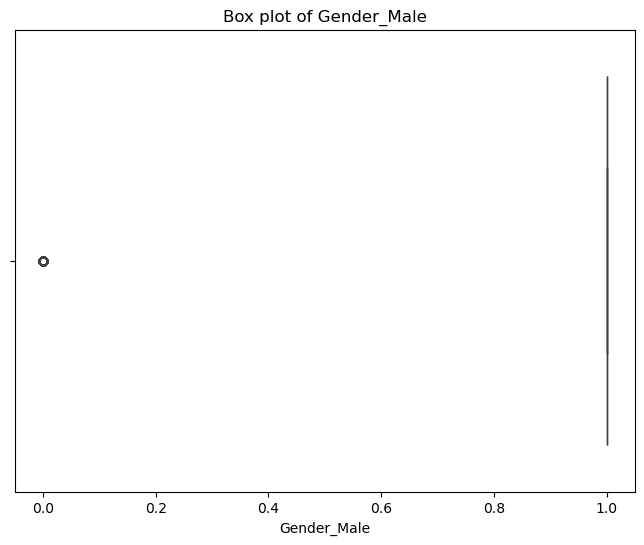

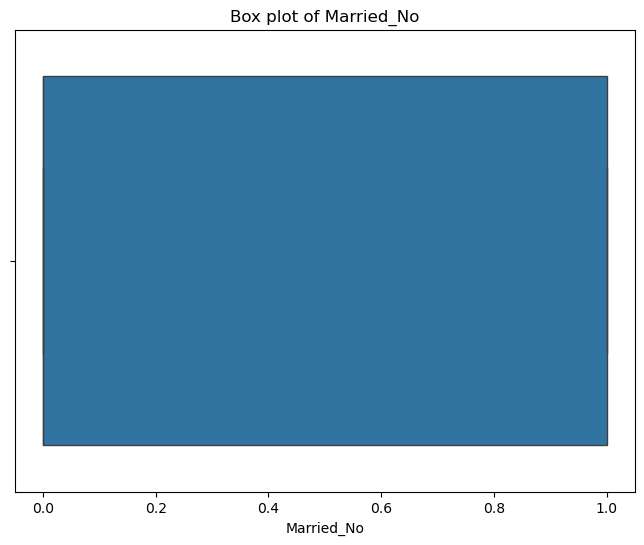

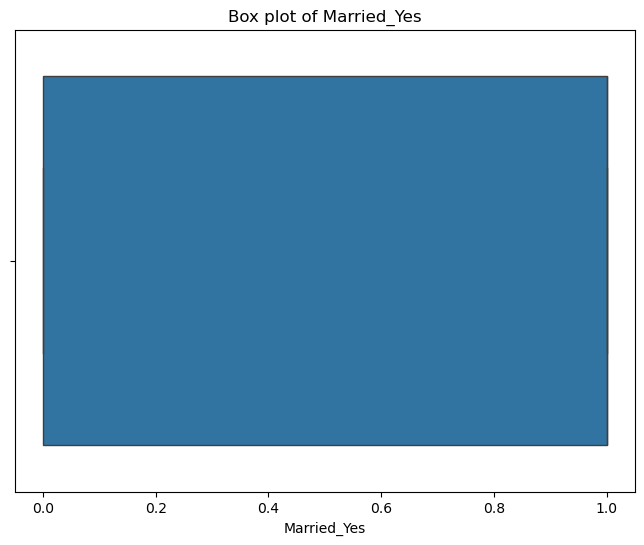

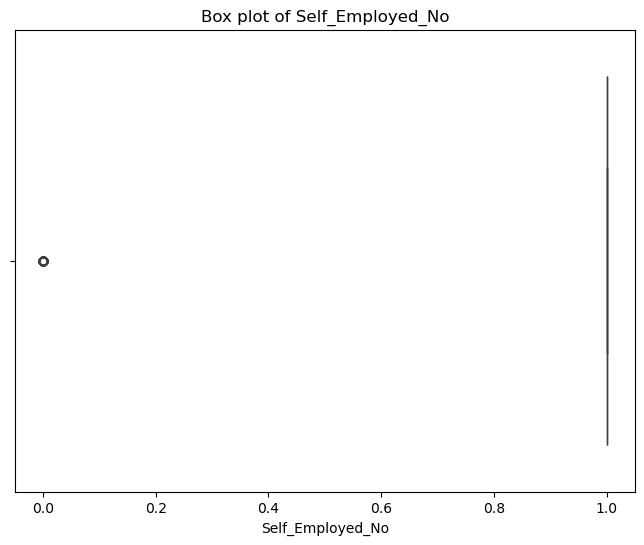

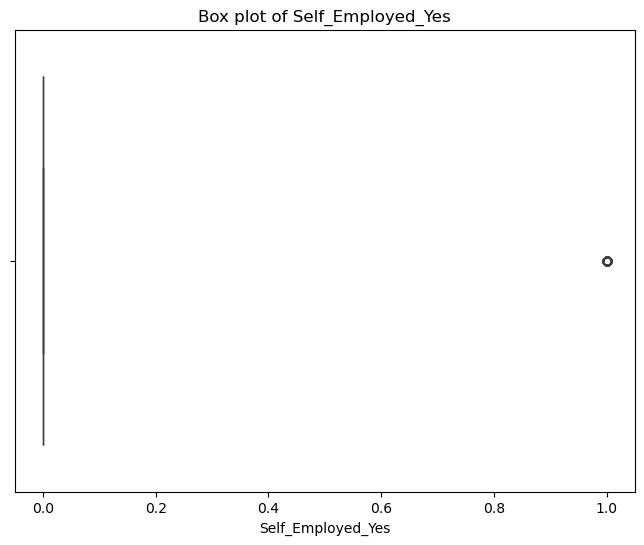

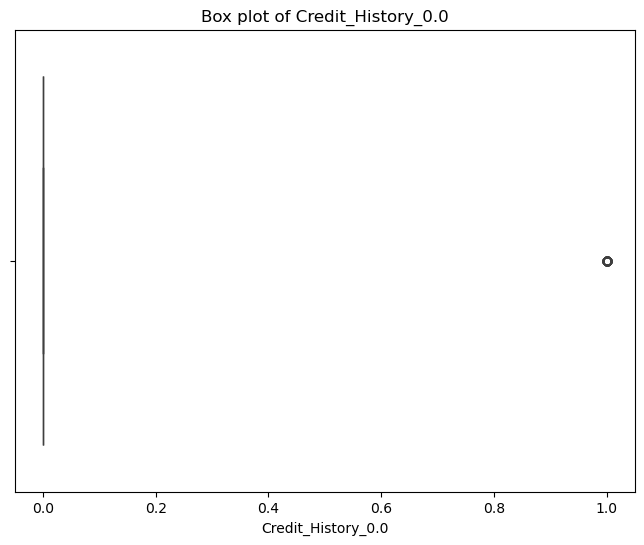

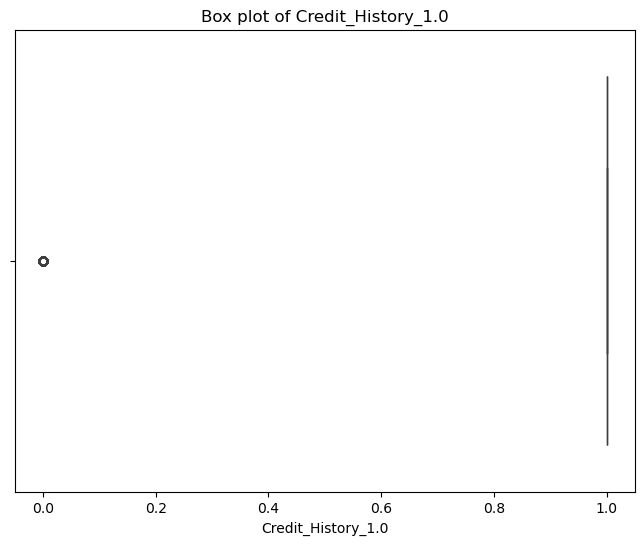

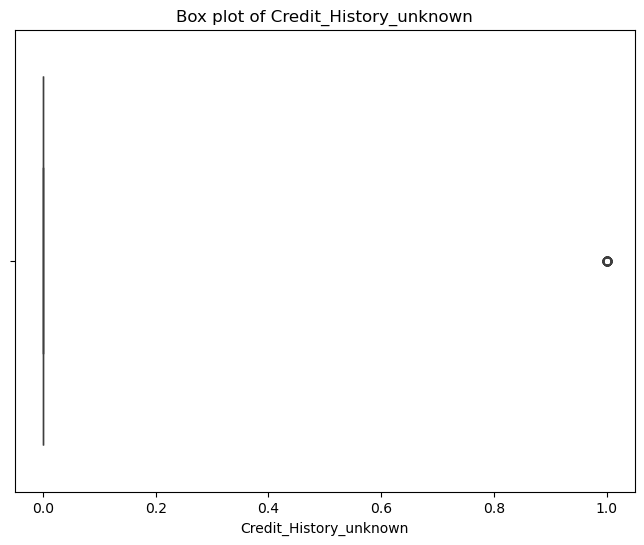

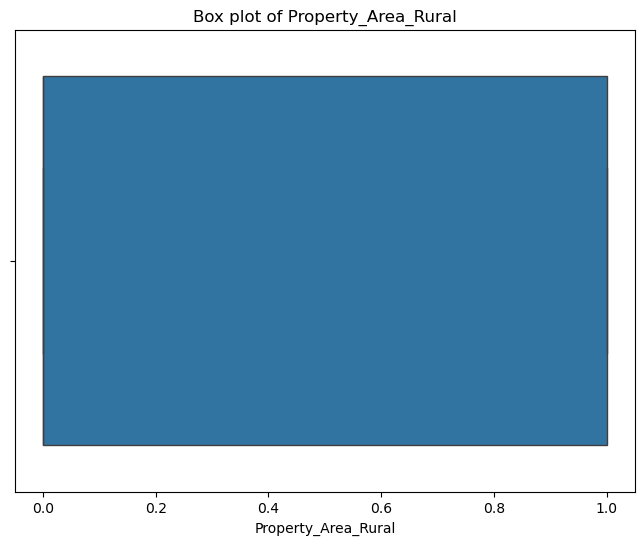

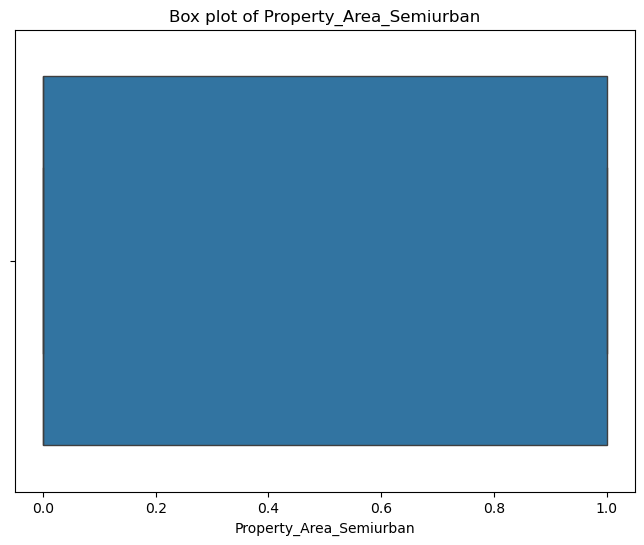

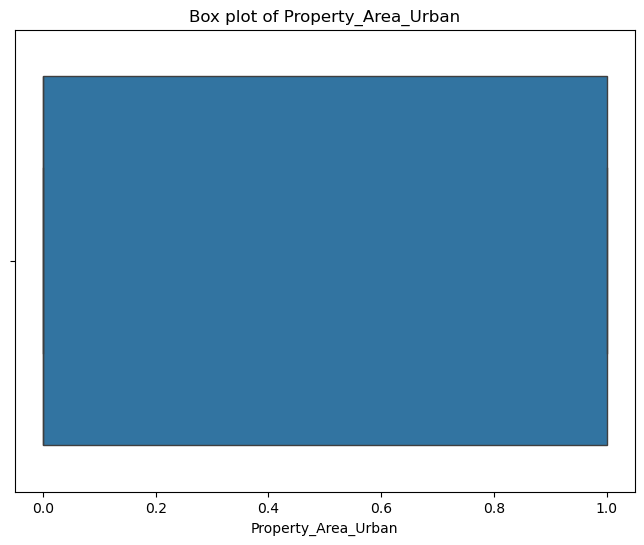

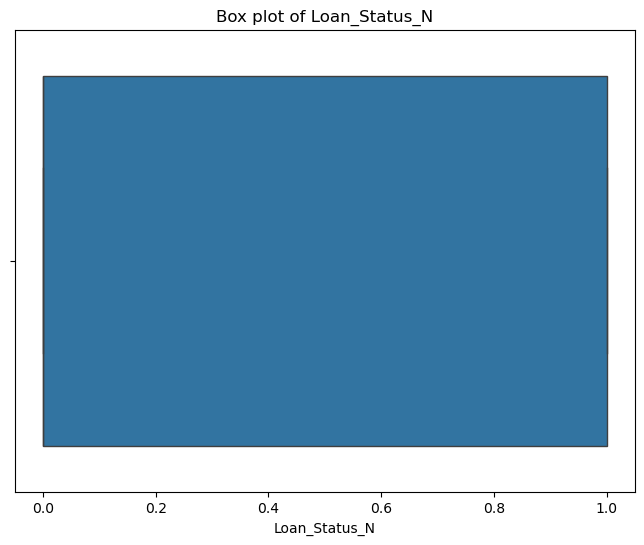

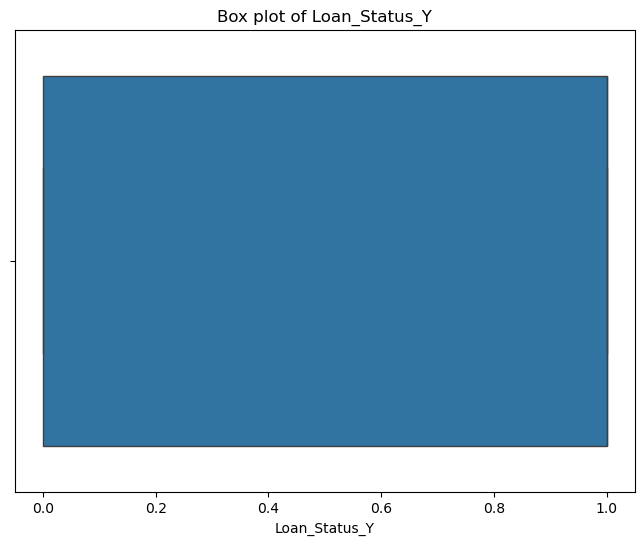

In [83]:
# 
# Select all numerical columns and store them in loan_eligibility_df_num_cols
loan_eligibility_df_num_cols = loan_eligibility_df.select_dtypes(include=['int64', 'float64'])
# 
# Plot the box plots before removing outliers
for col in loan_eligibility_df_num_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=loan_eligibility_df_num_cols[col])
    plt.title(f"Box plot of {col}")
    plt.show()

In [84]:
# # 
# # Select all numerical columns and store them in loan_eligibility_df_num_cols_2
# loan_eligibility_df_num_cols_2 = loan_eligibility_df.select_dtypes(include=['int64', 'float64'])
# #IQR technique
# def get_whiskers(col):
#     Q1 = col.quantile(0.25)
#     Q3 = col.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_whisker = Q1 - 1.5 * IQR
#     upper_whisker = Q3 + 1.5 * IQR
#     # 
#     # This will get both whiskers for the columns
#     return lower_whisker, upper_whisker
# # 
# #to make work easier I want to remove outliers for all columns at once
# outlier_indices = set()#I will place outliers in this set and drop,this also helps to prevent duplicates despite a row having multiple outliers in different columns
# # 
# # Create a loop to get the IQR of all columns at once
# for col in loan_eligibility_df_num_cols_2.columns:
#     lw, uw = get_whiskers(loan_eligibility_df_num_cols_2[col])
#     index = np.where((loan_eligibility_df_num_cols_2[col] > uw) | (loan_eligibility_df_num_cols_2[col] < lw))
#     # 
#     # Store row indices in a set,it also prevents duplicates. It updates the empty set by putting all outliers inside it
#     outlier_indices.update(index[0])
# # 
# # Remove all outlier rows at once by converting it to a list then droping from df_num
# loan_eligibility_df_num_cols_2.drop(list(outlier_indices), inplace=True)
# 
# 
# 
# 
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n{column} Outlier Summary:")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")
    
    return outliers
# 
# Loop through all numeric columns and apply the IQR function
numeric_cols = loan_eligibility_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(loan_eligibility_df, col)



Dependents Outlier Summary:
Q1 = 0.0, Q3 = 1.0, IQR = 1.0
Lower bound = -1.5, Upper bound = 2.5
Number of outliers: 51

Education Outlier Summary:
Q1 = 1.0, Q3 = 1.0, IQR = 0.0
Lower bound = 1.0, Upper bound = 1.0
Number of outliers: 134

ApplicantIncome Outlier Summary:
Q1 = 2877.5, Q3 = 5795.0, IQR = 2917.5
Lower bound = -1498.75, Upper bound = 10171.25
Number of outliers: 50

CoapplicantIncome Outlier Summary:
Q1 = 0.0, Q3 = 2297.25, IQR = 2297.25
Lower bound = -3445.875, Upper bound = 5743.125
Number of outliers: 18

LoanAmount Outlier Summary:
Q1 = 100.25, Q3 = 164.75, IQR = 64.5
Lower bound = 3.5, Upper bound = 261.5
Number of outliers: 41

Loan_Amount_Term Outlier Summary:
Q1 = 360.0, Q3 = 360.0, IQR = 0.0
Lower bound = 360.0, Upper bound = 360.0
Number of outliers: 88

Gender_Female Outlier Summary:
Q1 = 0.0, Q3 = 0.0, IQR = 0.0
Lower bound = 0.0, Upper bound = 0.0
Number of outliers: 112

Gender_Male Outlier Summary:
Q1 = 1.0, Q3 = 1.0, IQR = 0.0
Lower bound = 1.0, Upper boun

We only remove outliers for continuous data columns (i.e., ApplicantIncome, CoapplicantIncome, LoanAmount)only not categorical columns (i.e., Dependents, Education, Gender, Married, Self-employed, credit history, property area, loan status,loan amount term )

In [85]:
# 
# Apply log1p transformation to the columns with outliers
loan_eligibility_df['log_ApplicantIncome'] = np.log1p(loan_eligibility_df['ApplicantIncome'])
loan_eligibility_df['log_CoapplicantIncome'] = np.log1p(loan_eligibility_df['CoapplicantIncome'])
loan_eligibility_df['log_LoanAmount'] = np.log1p(loan_eligibility_df['LoanAmount'])

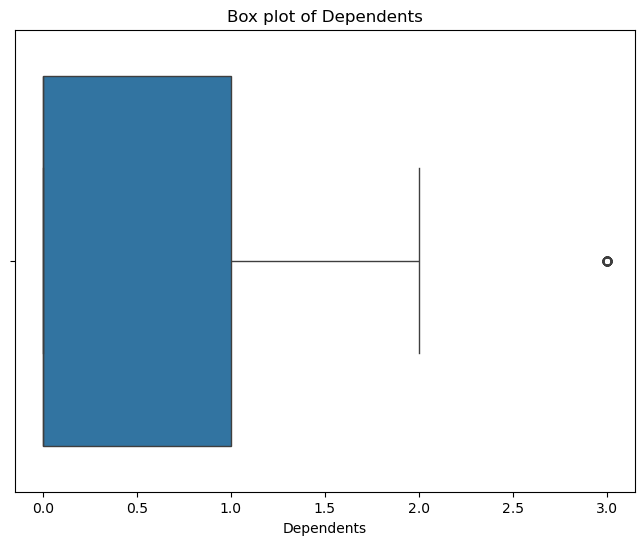

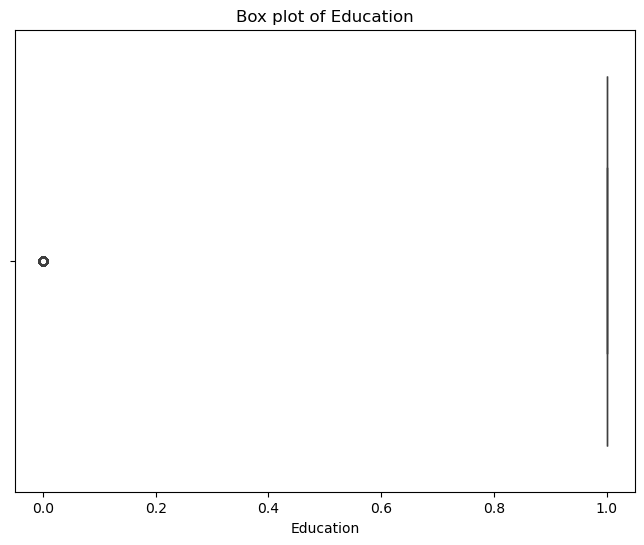

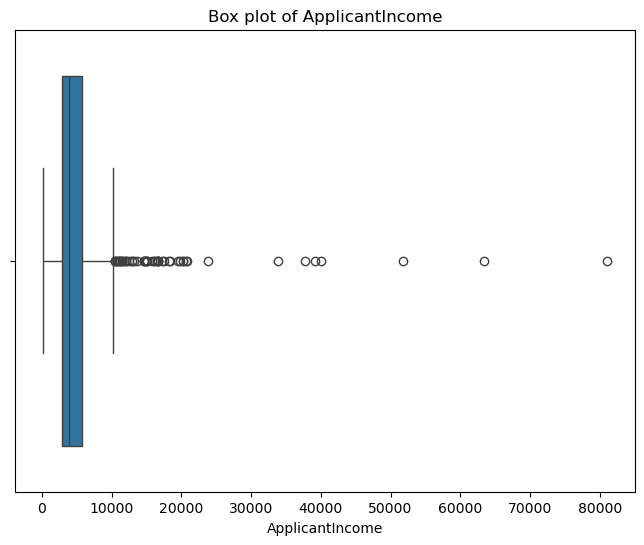

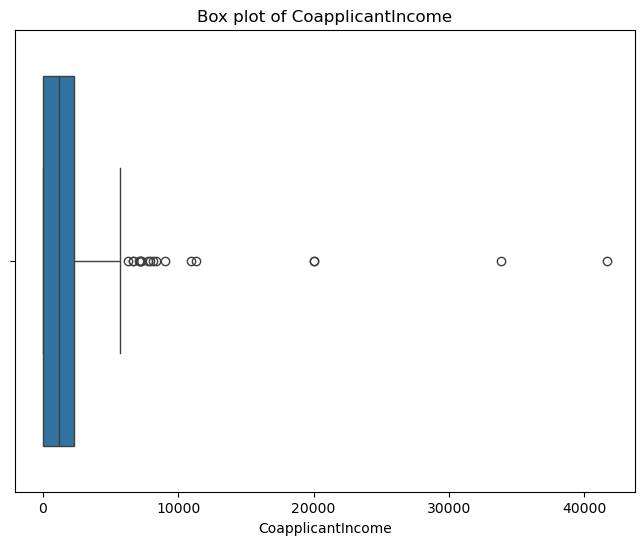

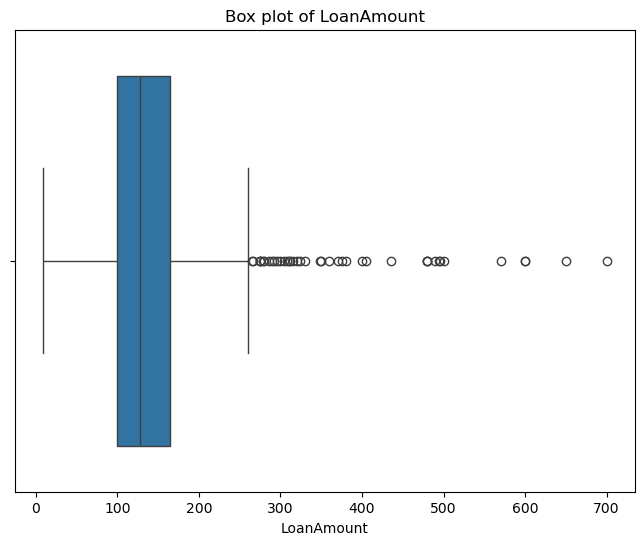

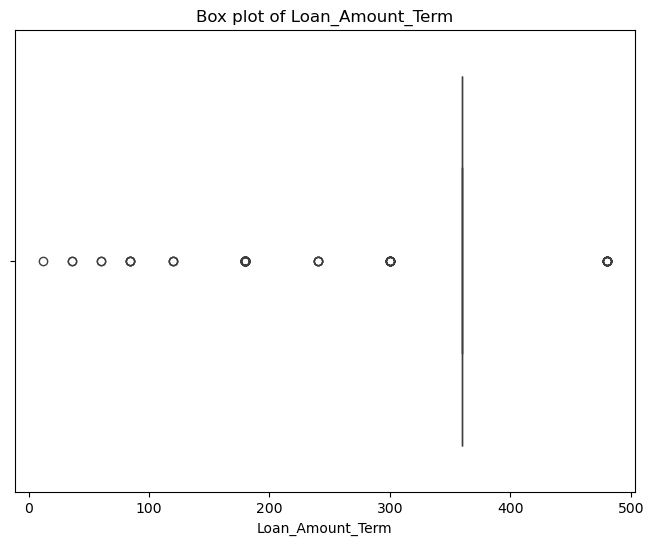

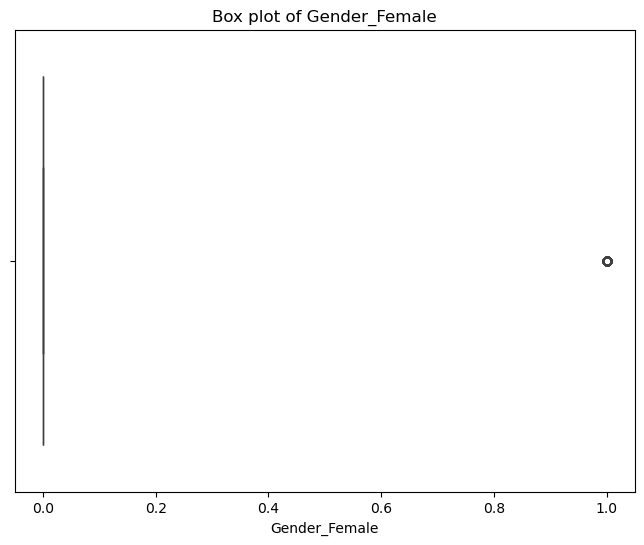

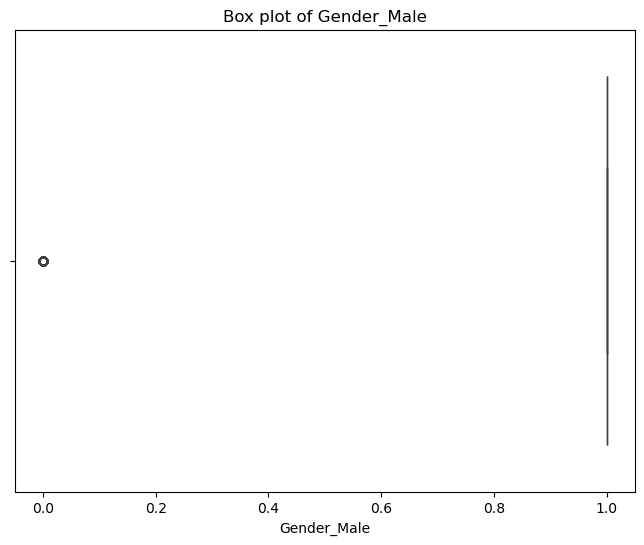

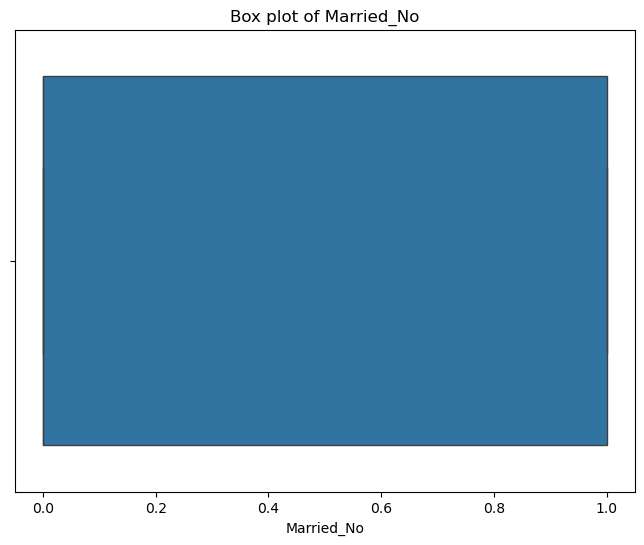

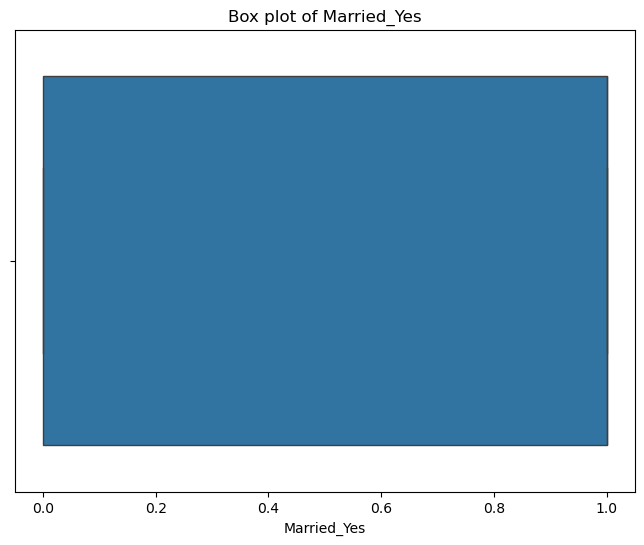

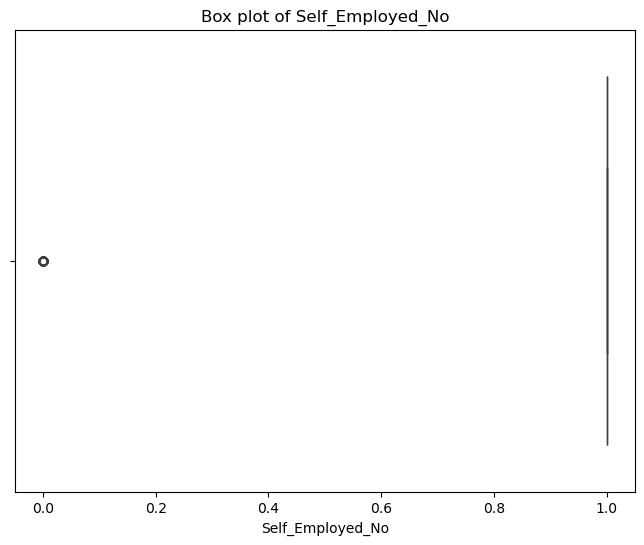

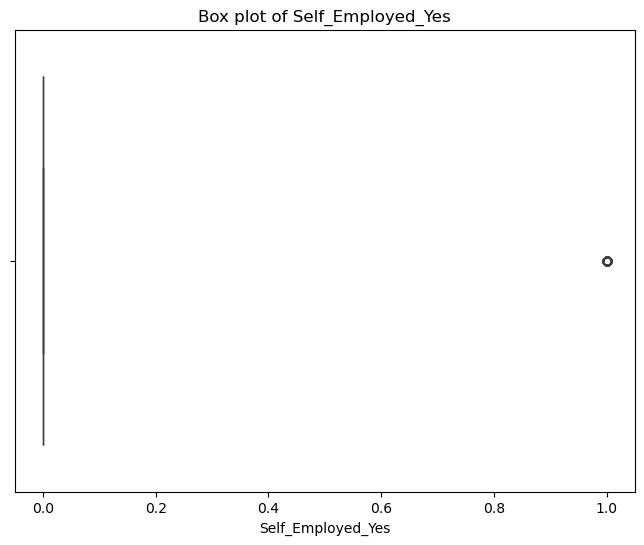

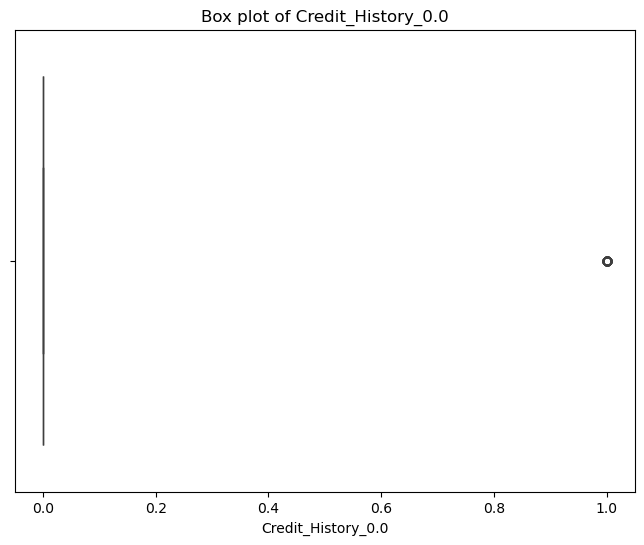

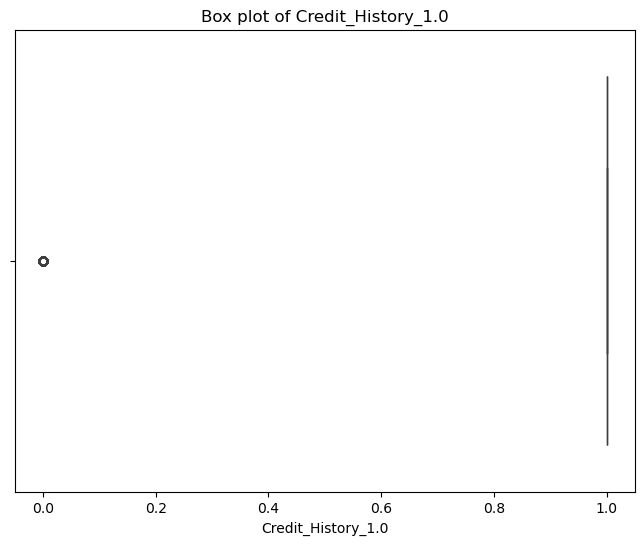

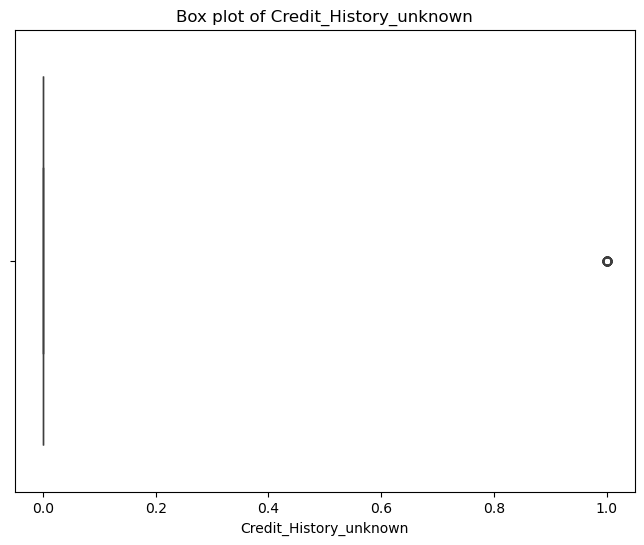

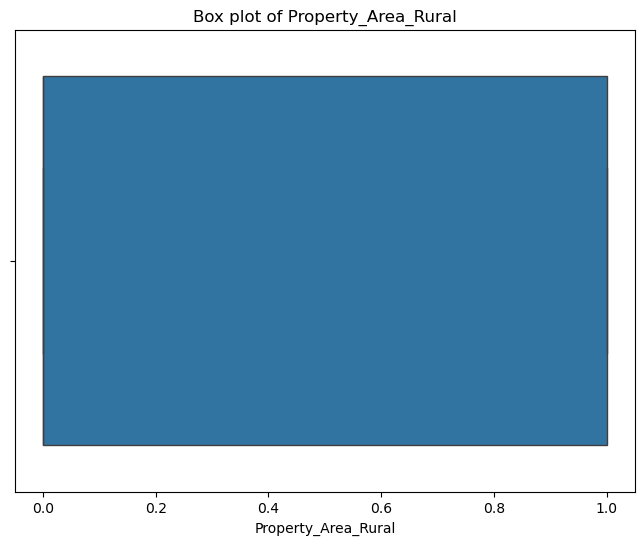

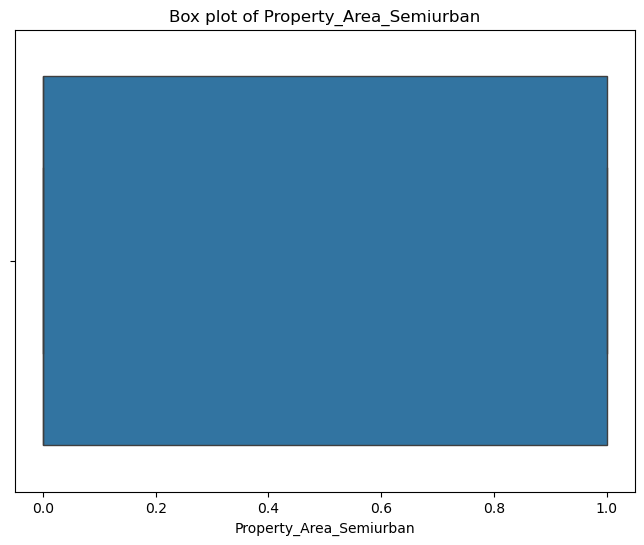

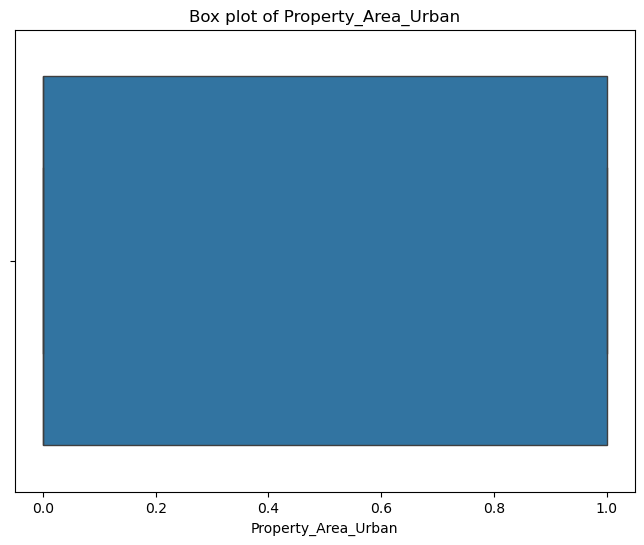

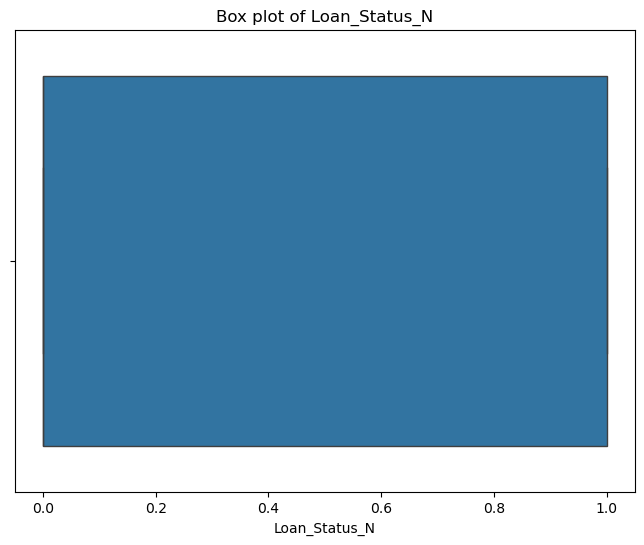

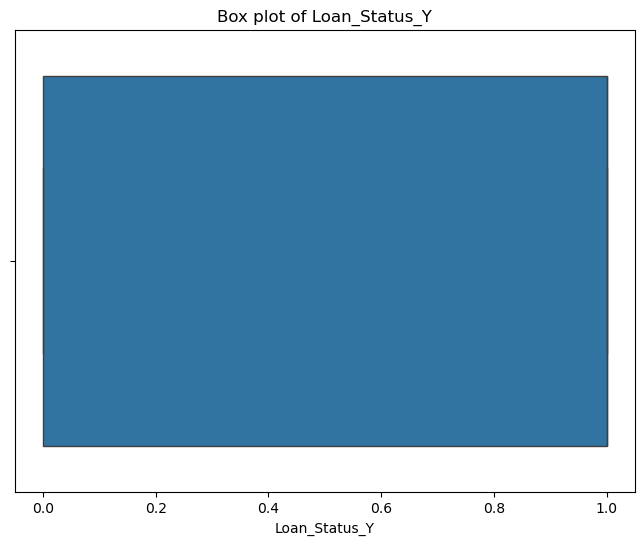

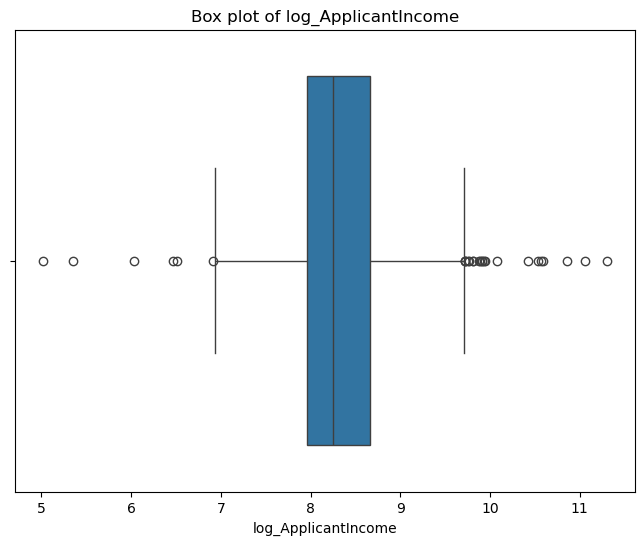

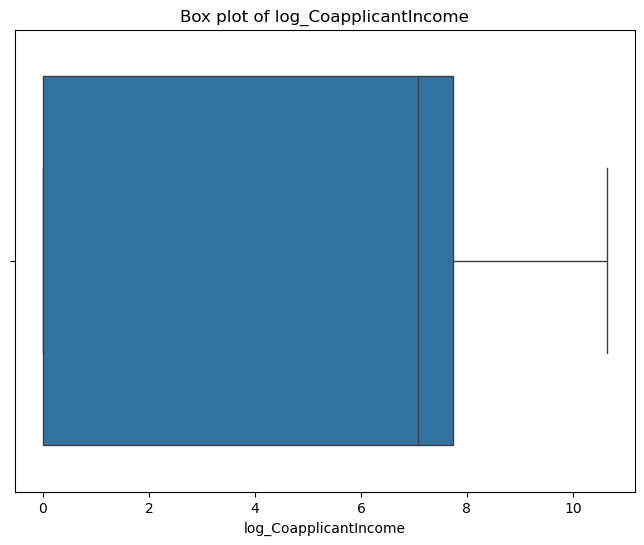

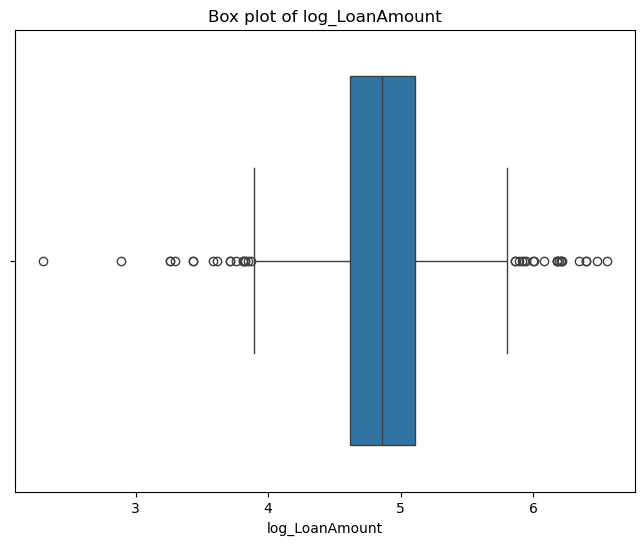

In [86]:
# 
# Plot the box plots after removing outliers
for col in loan_eligibility_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=loan_eligibility_df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

In [87]:
df_num_cols_2 = loan_eligibility_df.select_dtypes(include=['int64', 'float64'])
skewness_2 = df_num_cols_2.skew()
skewness_2

Dependents                 1.015551
Education                 -1.367622
ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.402112
Gender_Female              1.648795
Gender_Male               -1.648795
Married_No                 0.644850
Married_Yes               -0.644850
Self_Employed_No          -2.159796
Self_Employed_Yes          2.159796
Credit_History_0.0         2.021971
Credit_History_1.0        -1.310835
Credit_History_unknown     3.068326
Property_Area_Rural        0.919670
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Loan_Status_N              0.809998
Loan_Status_Y             -0.809998
log_ApplicantIncome        0.482128
log_CoapplicantIncome     -0.173073
log_LoanAmount            -0.151578
dtype: float64

### 

# 4. Exploratory Data Analysis

In [88]:
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   Education                614 non-null    int64  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Gender_Female            614 non-null    int64  
 7   Gender_Male              614 non-null    int64  
 8   Married_No               614 non-null    int64  
 9   Married_Yes              614 non-null    int64  
 10  Self_Employed_No         614 non-null    int64  
 11  Self_Employed_Yes        614 non-null    int64  
 12  Credit_History_0.0       614 non-null    int64  
 13  Credit_History_1.0       614 non-null    int64  
 14  Credit_History_unknown   6

In [109]:
loan_eligibility_df

Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0             0          1             5849                0.0       128.0   
1             1          1             4583             1508.0       128.0   
2             0          1             3000                0.0        66.0   
3             0          0             2583             2358.0       120.0   
4             0          1             6000                0.0       141.0   
..          ...        ...              ...                ...         ...   
609           0          1             2900                0.0        71.0   
610           3          1             4106                0.0        40.0   
611           1          1             8072              240.0       253.0   
612           2          1             7583                0.0       187.0   
613           0          1             4583                0.0       133.0   

     Loan_Amount_Term  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               360.0              0            1           1            0   
1               360.0              0            1           0            1   
2               360.0              0            1           0            1   
3               360.0              0            1           0            1   
4               360.0              0            1           1            0   
..                ...            ...          ...         ...          ...   
609             360.0              1            0           1            0   
610             180.0              0            1           0            1   
611             360.0              0            1           0            1   
612             360.0              0            1           0            1   
613             360.0              1            0           1            0   

     ...  Credit_History_1.0  Credit_History_unknown  Property_Area_Rural  \
0    ...                   1                       0                    0   
1    ...                   1                       0                    1   
2    ...                   1                       0                    0   
3    ...                   1                       0                    0   
4    ...                   1                       0                    0   
..   ...                 ...                     ...                  ...   
609  ...                   1                       0                    1   
610  ...                   1                       0                    1   
611  ...                   1                       0                    0   
612  ...                   1                       0                    0   
613  ...                   0                       0                    0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_N  \
0                          0                    1              0   
1                          0                    0              1   
2                          0                    1              0   
3                          0                    1              0   
4                          0                    1              0   
..                       ...                  ...            ...   
609                        0                    0              0   
610                        0                    0              0   
611                        0                    1              0   
612                        0                    1              0   
613                        1                    0              1   

     Loan_Status_Y  log_ApplicantIncome  log_CoapplicantIncome  log_LoanAmount  
0                1             8.674197               0.000000        4.859812  
1                0             8.430327               7.319202        4.859812  
2                1             8.006701               0.000000        4.204693  
3                1             7.857094               7.765993   

## 4.1. The overall approval rate

In [89]:
# 
# Check the counts of Loan_Status_Y
ln_st_Y_counts = loan_eligibility_df['Loan_Status_Y'].value_counts()
# 
# Check the total rows of the DataFrame
entries = len(loan_eligibility_df)
# 
# Approval Rating = (No. of Loan_status_Y / Total rows in DataFrame) * 100
approval_rate = (ln_st_Y_counts / entries) * 100
print(f"\nOverall Loan Approval Rate: {approval_rate[1]:.2f}%")


Overall Loan Approval Rate: 68.73%


## 4.2. Explore how different features relate to loan approval:

### 4.2.1. Loan approval by gender

In [90]:
gender_m_approval_y_counts = loan_eligibility_df.groupby('Gender_Male')['Loan_Status_Y'].value_counts()
gender_m_approval_n_counts = loan_eligibility_df.groupby('Gender_Male')['Loan_Status_N'].value_counts()
gender_f_approval_y_counts = loan_eligibility_df.groupby('Gender_Female')['Loan_Status_Y'].value_counts()
gender_f_approval_n_counts = loan_eligibility_df.groupby('Gender_Female')['Loan_Status_N'].value_counts()
gender_m_approval_rate = (gender_m_approval_y_counts[1][1] / (gender_m_approval_y_counts[1][1] + gender_m_approval_n_counts[1][1])) * 100
gender_f_approval_rate = (gender_f_approval_y_counts[1][1] / (gender_f_approval_y_counts[1][1] + gender_f_approval_n_counts[1][1])) * 100

print(
f"""
    The male approval rating is: {gender_m_approval_rate:.2f}%
    The female approval rating is: {gender_f_approval_rate:.2f}%
"""
)


    The male approval rating is: 69.12%
    The female approval rating is: 66.96%



### 4.2.2. Impact of credit history

In [91]:
credit_impact = loan_eligibility_df.groupby(['Credit_History_1.0', 'Credit_History_0.0', 'Credit_History_unknown'])['Loan_Status_Y'].mean()
print(credit_impact)

Credit_History_1.0  Credit_History_0.0  Credit_History_unknown
0                   0                   1                         0.740000
                    1                   0                         0.078652
1                   0                   0                         0.795789
Name: Loan_Status_Y, dtype: float64


In [92]:
known_cred_hist_imp = credit_impact.loc[(1.0, 0.0, 0.0)] * 100
no_cred_hist_imp = credit_impact.loc[(0.0, 1.0, 0.0)]  * 100
unknown_cred_hist_imp = credit_impact.loc[(0.0, 0.0, 1.0)]  * 100

In [93]:
print(
    f"""
        When a lendee has a credit history, it has a {known_cred_hist_imp:.2f}% impact on loan eligibility.
        When a lendee has no credit history, it has a {no_cred_hist_imp:.2f}% impact on loan eligibility.
        When a lendee has unknown credit history, it has a {unknown_cred_hist_imp:.2f}% impact on loan eligibility.
    """
)


        When a lendee has a credit history, it has a 79.58% impact on loan eligibility.
        When a lendee has no credit history, it has a 7.87% impact on loan eligibility.
        When a lendee has unknown credit history, it has a 74.00% impact on loan eligibility.
    


### 4.2.3. Influence of marital status, education, and property area

In [94]:
married_approval = loan_eligibility_df.groupby(['Married_Yes', 'Married_No'])['Loan_Status_Y'].mean() * 100
married_y_approval = married_approval[1][0]
married_n_approval = married_approval[0][1]
print(
    f"""
        If the lendee is married, then it has a {married_y_approval:.2f}% impact on loan eligibility.
        If the lendee is not married, then it has a {married_n_approval:.2f}% impact on loan eligibility.
    """
)


        If the lendee is married, then it has a 71.82% impact on loan eligibility.
        If the lendee is not married, then it has a 62.91% impact on loan eligibility.
    


In [95]:
educated_approval = loan_eligibility_df.groupby(['Education'])['Loan_Status_Y'].mean() * 100
educated_grad_approval = educated_approval[1]
educated_not_approval = educated_approval[0]
print(
    f"""
        If the lendee is educated, then it has a {educated_grad_approval:.2f}% impact on loan eligibility.
        If the lendee is not educated, then it has a {educated_not_approval:.2f}% impact on loan eligibility.
    """
)


        If the lendee is educated, then it has a 70.83% impact on loan eligibility.
        If the lendee is not educated, then it has a 61.19% impact on loan eligibility.
    


In [96]:
property_area_approval = loan_eligibility_df.groupby(['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban'])['Loan_Status_Y'].mean() * 100
property_area_urban_approval = property_area_approval[0][0][1]
property_area_semiurban_approval = property_area_approval[0][1][0]
property_area_rural_approval = property_area_approval[1][0][0]
print(
    f"""
        If the lendee's property is in the urban area, then it has a {property_area_urban_approval:.2f}% impact on loan eligibility.
        If the lendee's property is in the semiurban area, then it has a {property_area_semiurban_approval:.2f}% impact on loan eligibility.
        If the lendee's property is in the rural area, then it has a {property_area_rural_approval:.2f}% impact on loan eligibility.
    """
)


        If the lendee's property is in the urban area, then it has a 65.84% impact on loan eligibility.
        If the lendee's property is in the semiurban area, then it has a 76.82% impact on loan eligibility.
        If the lendee's property is in the rural area, then it has a 61.45% impact on loan eligibility.
    


## 4.3. What are the most common loan amount terms?

In [97]:
most_common_l_a_t = loan_eligibility_df['Loan_Amount_Term'].mode()[0]
print(f"The most common loan amount term is: {most_common_l_a_t:.0f} months")

The most common loan amount term is: 360 months


## 4.4. Identify income and loan amount trends among approved and unapproved applicants.

In [98]:
# Income vs approval
# loan_eligibility_df.groupby('Loan_Status_Y')[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].mean()

# 5. Data Visualization and Storytelling

## 5.1. Create visualizations that highlight key insights:

### 5.1.1. Bar Plots for categorical variable distribution

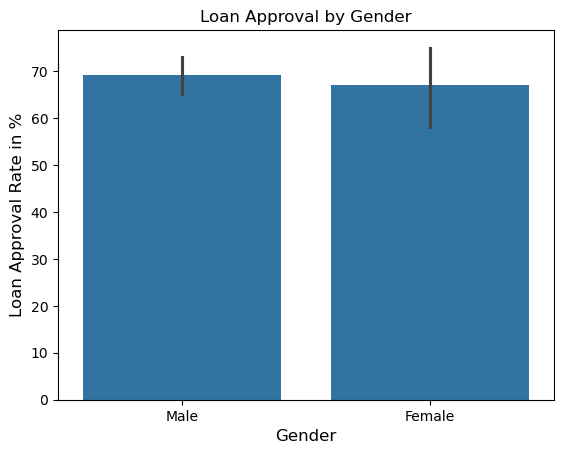

In [107]:
sns.barplot(
    x = loan_eligibility_df.assign(Gender=loan_eligibility_df['Gender_Female'].apply(lambda x: 'Female' if x == 1 else 'Male'))['Gender'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

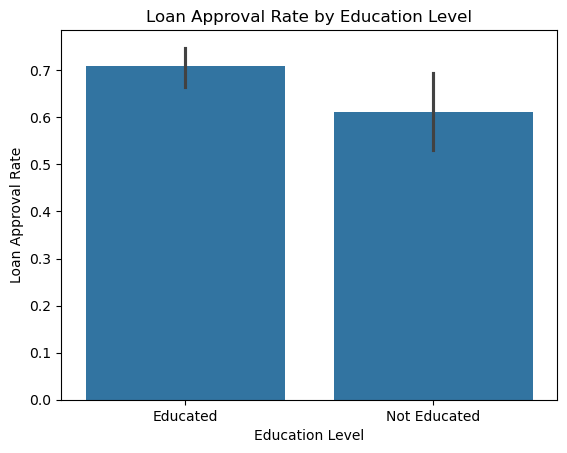

In [126]:
sns.barplot(
    data = loan_eligibility_df,
    x = loan_eligibility_df.assign(Education = loan_eligibility_df['Education'].apply(lambda x: 'Educated' if x == 1 else 'Not Educated'))['Education'],
    y='Loan_Status_Y'
)
plt.xlabel('Education Level')
plt.ylabel('Loan Approval Rate')
plt.title('Loan Approval Rate by Education Level')
plt.show()

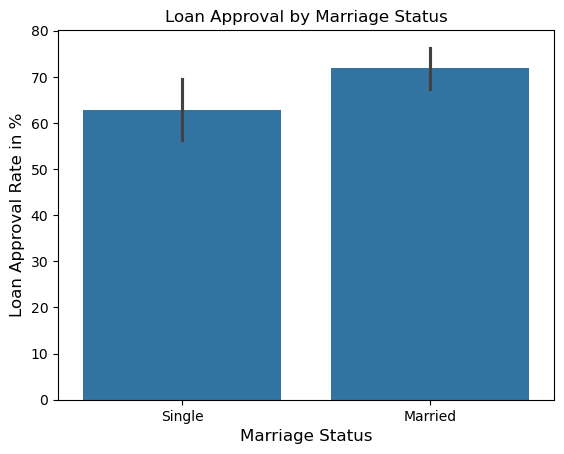

In [112]:
sns.barplot(
    x = loan_eligibility_df.assign(Married = loan_eligibility_df['Married_Yes'].apply(lambda x: 'Married' if x == 1 else 'Single'))['Married'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Marriage Status')
plt.xlabel('Marriage Status', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

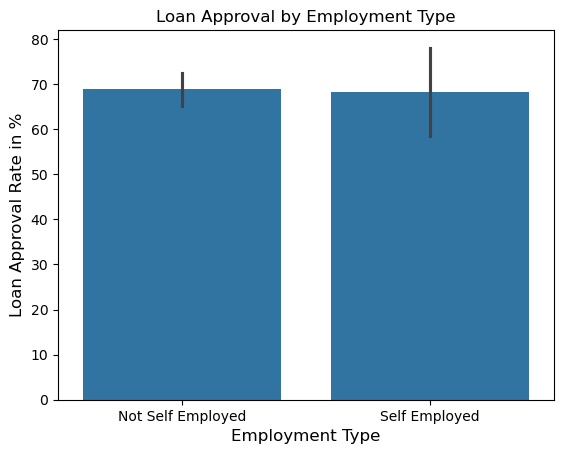

In [122]:
sns.barplot(
    x = loan_eligibility_df.assign(Employed = loan_eligibility_df['Self_Employed_Yes'].apply(lambda x: 'Self Employed' if x == 1 else 'Not Self Employed'))['Employed'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Employment Type')
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

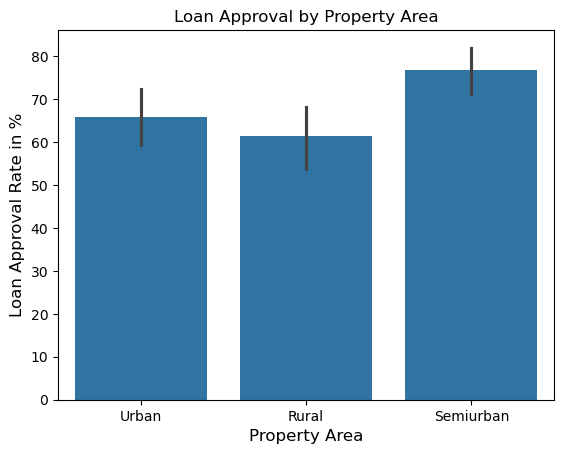

In [124]:
sns.barplot(
    x = loan_eligibility_df.assign(Property_Area = loan_eligibility_df.apply(lambda x: 'Urban' if x['Property_Area_Urban'] == 1 else ('Semiurban' if x['Property_Area_Semiurban'] == 1 else 'Rural'),
    axis=1))['Property_Area'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by Property Area')
plt.xlabel('Property Area', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

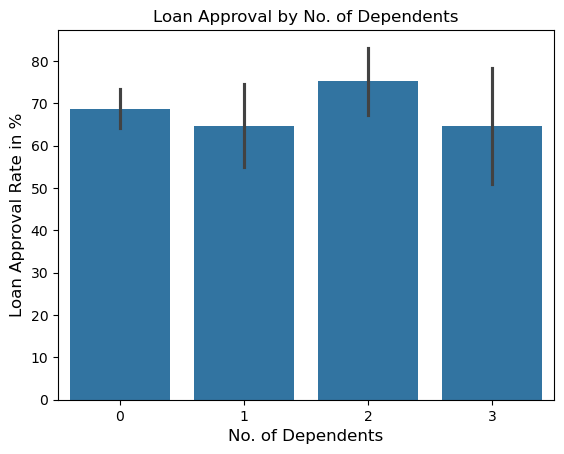

In [128]:
sns.barplot(
    data = loan_eligibility_df,
    x = loan_eligibility_df['Dependents'],
    y = loan_eligibility_df['Loan_Status_Y'] * 100
)
plt.title('Loan Approval by No. of Dependents')
plt.xlabel('No. of Dependents', fontsize=12)
plt.ylabel('Loan Approval Rate in %', fontsize=12)   
plt.show()

### 5.1.2. Box plots for income and loan amount

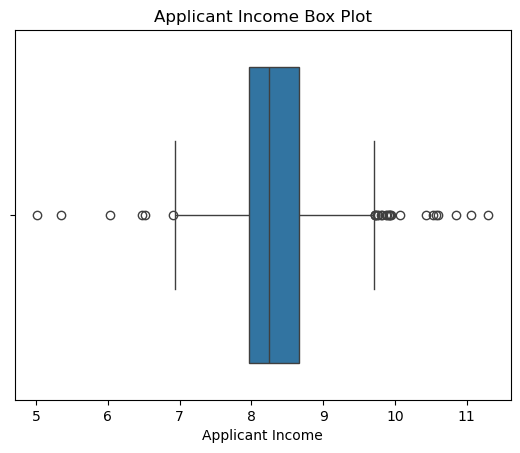

In [135]:
sns.boxplot(x='log_ApplicantIncome', data = loan_eligibility_df)
plt.title('Applicant Income Box Plot')
plt.xlabel('Applicant Income')
plt.show()

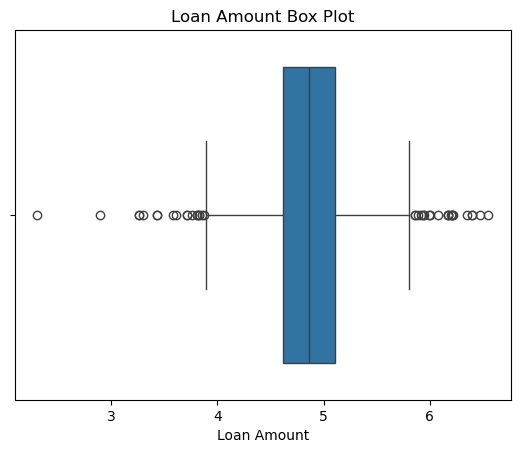

In [136]:
sns.boxplot(x='log_LoanAmount', data = loan_eligibility_df)
plt.title('Loan Amount Box Plot')
plt.xlabel('Loan Amount')
plt.show()

### 5.1.3. Heatmap of correlations

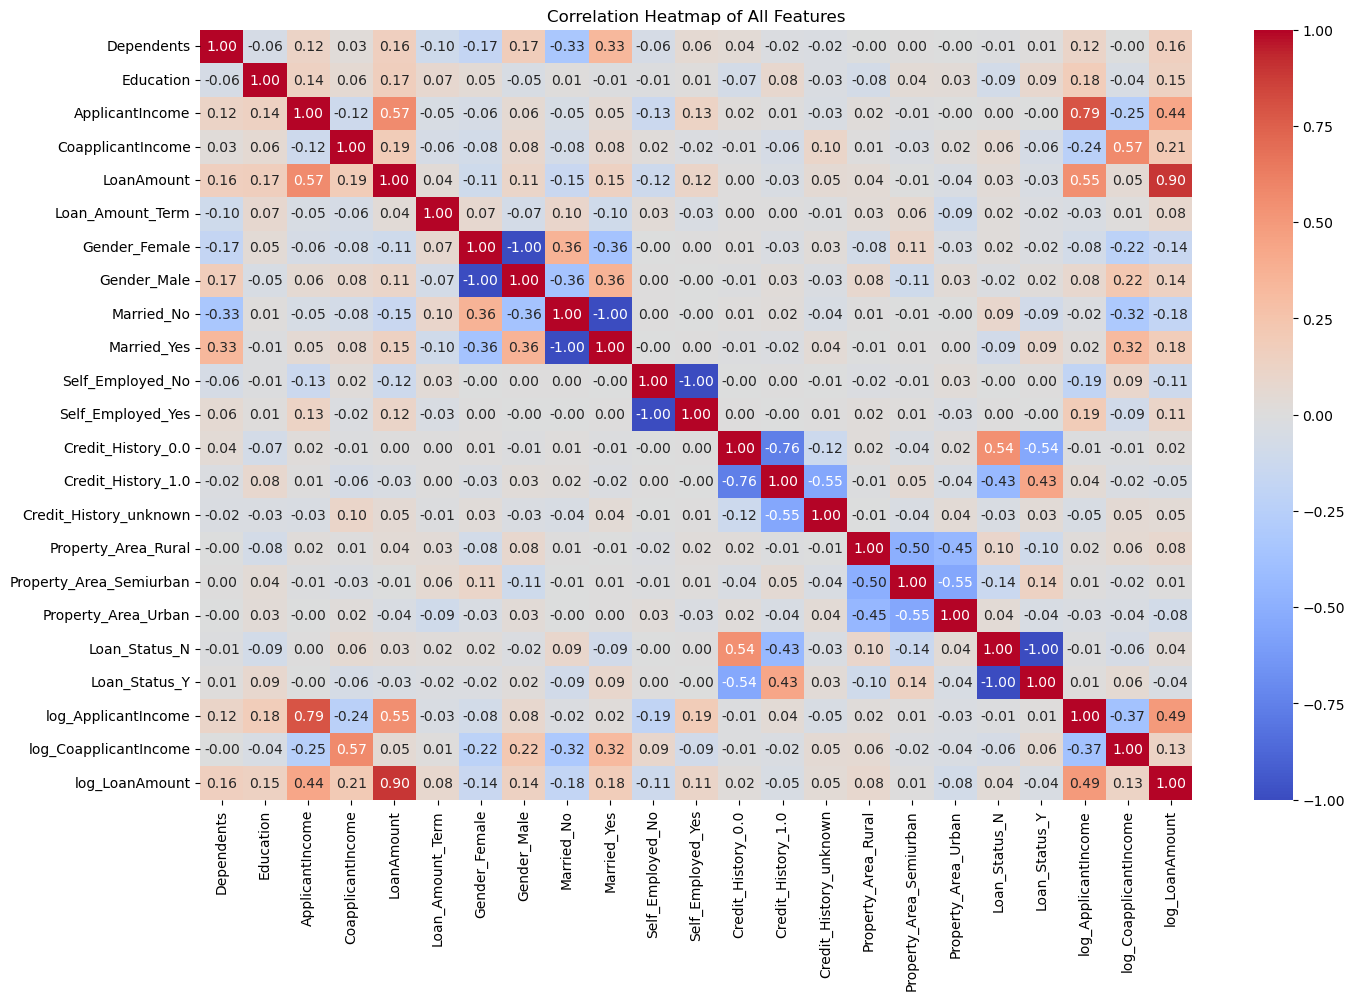

In [140]:
# 
# Compute correlation matrix (only for numeric columns)
corr_matrix = loan_eligibility_df.corr()
# 
# Draw heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap of All Features')
plt.show()

## 5.2. Tell a Data Story:

### 5.2.1. Summarize which customer segments are most likely to be approved.

### 5.2.2. What insights can be used for marketing or customer targeting?